------
# Importing libraries

In [9]:
! pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import missingno as msno
from sklearn.impute import SimpleImputer
import eda_script as eda

# Reading dataset

In [11]:
def read_file(*args)->pd.DataFrame:
    path = os.path.join(*args)
    return pd.read_csv(path)

In [12]:
folder="/home/spynom/PycharmProjects/real-state-regression-project/"

In [13]:
train=read_file(folder,"data","clean","train.csv")

In [14]:
train.head(10)

,size,address,rate,property_status,bathrooms,security_deposit,facing,furnishing_status,rera_id,ownership_type,...,furnish_detail_bed,furnish_detail_dining_table,furnish_detail_washing_machine,furnish_detail_tv,furnish_detail_microwave,furnish_detail_wardrobe,furnish_detail_sofa,furnish_detail_wifi,furnish_detail_refrigerator,price_in_lakh
0,3720.0,"sector 107, noida",14900.0,Under Construction,NaN,No Deposit,NaN,Unfurnished,UPRERAPRJ125561,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554.00
1,850.0,"sector 53, noida",6249.0,Ready to move,2.0,No Deposit,NaN,Unfurnished,NaN,Freehold,...,False,True,True,False,True,False,True,True,True,53.12
2,1075.0,"sector 74, noida",9767.0,Ready to move,2.0,No Deposit,NaN,Semi-Furnished,UPRERAPRJ5655,NaN,...,False,False,False,False,False,False,False,False,False,105.00
3,1927.0,"sector 150, noida",15938.0,Under Construction,NaN,No Deposit,NaN,Unfurnished,"UPRERAPRJ13521, UPRERAPRJ14252",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.00
4,1839.0,"sector 70, noida",8500.0,Ready to move,3.0,No Deposit,East,Unfurnished,UPRERAPRJ5667,NaN,...,False,False,False,False,False,False,False,False,False,156.00
5,1115.0,"sector 77, noida",10313.0,Ready to move,2.0,No Deposit,NaN,Semi-Furnished,NaN,NaN,...,False,False,False,False,False,False,False,False,False,115.00
6,1554.0,"sector 168, noida",10625.0,Ready to move,2.0,No Deposit,NaN,Unfurnished,"UPRERAPRJ10240, UPRERAPRJ10275",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.00
7,1725.0,"sector 137, noida",11014.0,Ready to move,4.0,No Deposit,NorthEast,Semi-Furnished,UPRERAPRJ11424,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.00
8,3300.0,"sector 78, noida",15151.0,Ready to move,4.0,No Deposit,East,Furnished,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.00
9,1000.0,"sector 104, noida",4800.0,Ready to move,2.0,No Deposit,South,Semi-Furnished,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.00


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   size                             7269 non-null   float64
 1   address                          7269 non-null   object 
 2   rate                             7225 non-null   float64
 3   property_status                  7269 non-null   object 
 4   bathrooms                        5791 non-null   float64
 5   security_deposit                 7269 non-null   object 
 6   facing                           3260 non-null   object 
 7   furnishing_status                7269 non-null   object 
 8   rera_id                          4821 non-null   object 
 9   ownership_type                   1015 non-null   object 
 10  overlooking                      997 non-null    object 
 11  bedroom                          7269 non-null   float64
 12  type1               

In [16]:
train.describe(include="number")

,size,rate,bathrooms,bedroom,carpet_area,age_of_property,floor_,total_floor,additional_rooms,balconies_,booking_amount_in_lakh,price_in_lakh
count,7269.000000,7225.000000,5791.000000,7269.000000,3697.000000,3745.000000,683.000000,680.000000,550.000000,569.000000,1130.000000,7225.000000
mean,1898.694731,8950.488166,2.718529,2.889668,1281.608872,5.712417,8.647145,18.741176,1.921818,2.878735,7.276930,196.100743
std,1203.551883,5686.772348,1.016717,0.851648,693.462805,6.357185,5.980413,8.768202,0.950159,1.233791,16.354467,230.219123
min,250.000000,355.000000,1.000000,1.000000,100.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.100000,11.500000
25%,1160.000000,4306.000000,2.000000,2.000000,861.000000,2.000000,5.000000,13.000000,1.000000,2.000000,0.850000,59.000000
50%,1565.000000,7904.000000,3.000000,3.000000,1150.000000,5.000000,7.000000,18.000000,2.000000,3.000000,1.000000,118.000000
75%,2190.000000,12100.000000,3.000000,3.000000,1467.000000,8.000000,11.500000,22.000000,3.000000,4.000000,5.000000,245.000000
max,18072.000000,83037.000000,7.000000,7.000000,11450.000000,125.000000,45.000000,80.000000,3.000000,7.000000,100.000000,3830.000000


In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [18]:
train.describe(include="object")

,address,property_status,security_deposit,facing,furnishing_status,rera_id,ownership_type,overlooking,type1,type2,price_negotiable,type_of_sale,amenities_sports_facility,amenities_shopping_mall,amenities_maintenance_staff,amenities_jogging_track,amenities_atm,amenities_gymnasium,amenities_indoor_games,amenities_rain_water_harvesting,amenities_swimming_pool,amenities_intercom,amenities_cafeteria,amenities_full_power_backup,amenities_lift,amenities_childrens_play_area,amenities_car_parking,amenities_landscaped_gardens,amenities_24_x_7_security,amenities_club_house,amenities_staff_quarter,amenities_hospital,amenities_multipurpose_room,amenities_vaastu_compliant,amenities_golf_course,amenities_school,furnish_detail_gas_connection,furnish_detail_ac,furnish_detail_bed,furnish_detail_dining_table,furnish_detail_washing_machine,furnish_detail_tv,furnish_detail_microwave,furnish_detail_wardrobe,furnish_detail_sofa,furnish_detail_wifi,furnish_detail_refrigerator
count,7269,7269,7269,3260,7269,4821,1015,997,7269,7269,7269,7269,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,2689,2689,2689,2689,2689,2689,2689,2689,2689,2689,2689
unique,102,2,1,8,3,184,4,17,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,"sector 150, noida",Ready to move,No Deposit,NorthEast,Semi-Furnished,Rera Not Applicable,Freehold,"Corner, Garden View, Pool View, Road View",BHK,Apartment,No,New,False,False,False,True,False,True,False,True,True,True,False,True,True,True,True,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
freq,1079,5052,7269,1455,3813,901,614,652,7211,7054,6337,4516,3456,3804,4249,4156,4604,5107,3400,4090,5282,4716,3840,5930,5887,5200,4837,5048,4892,5142,4036,5233,4397,3609,4785,4784,2509,1571,2452,1981,2060,2326,2003,2496,1980,2135,1959


## High-level analysis of missing values

In [19]:
[col for col in [col for col in list(train.columns) if "amenities" not in col] if "furnish" not in col]

['size',
 'address',
 'rate',
 'property_status',
 'bathrooms',
 'security_deposit',
 'facing',
 'rera_id',
 'ownership_type',
 'overlooking',
 'bedroom',
 'type1',
 'type2',
 'carpet_area',
 'age_of_property',
 'floor_',
 'total_floor',
 'additional_rooms',
 'price_negotiable',
 'balconies_',
 'type_of_sale',
 'booking_amount_in_lakh',
 'price_in_lakh']

In [20]:
df_=train.assign(
    amenities=train["amenities_sports_facility"],
    furnish_details=train["furnish_detail_gas_connection"]
).drop(columns=[col for col in list(train.columns) if "amenities_" in col or "furnish_" in col])
df_.columns

Index(['size', 'address', 'rate', 'property_status', 'bathrooms',
       'security_deposit', 'facing', 'furnishing_status', 'rera_id',
       'ownership_type', 'overlooking', 'bedroom', 'type1', 'type2',
       'carpet_area', 'age_of_property', 'floor_', 'total_floor',
       'additional_rooms', 'price_negotiable', 'balconies_', 'type_of_sale',
       'booking_amount_in_lakh', 'price_in_lakh', 'amenities',
       'furnish_details'],
      dtype='object')

<Axes: >

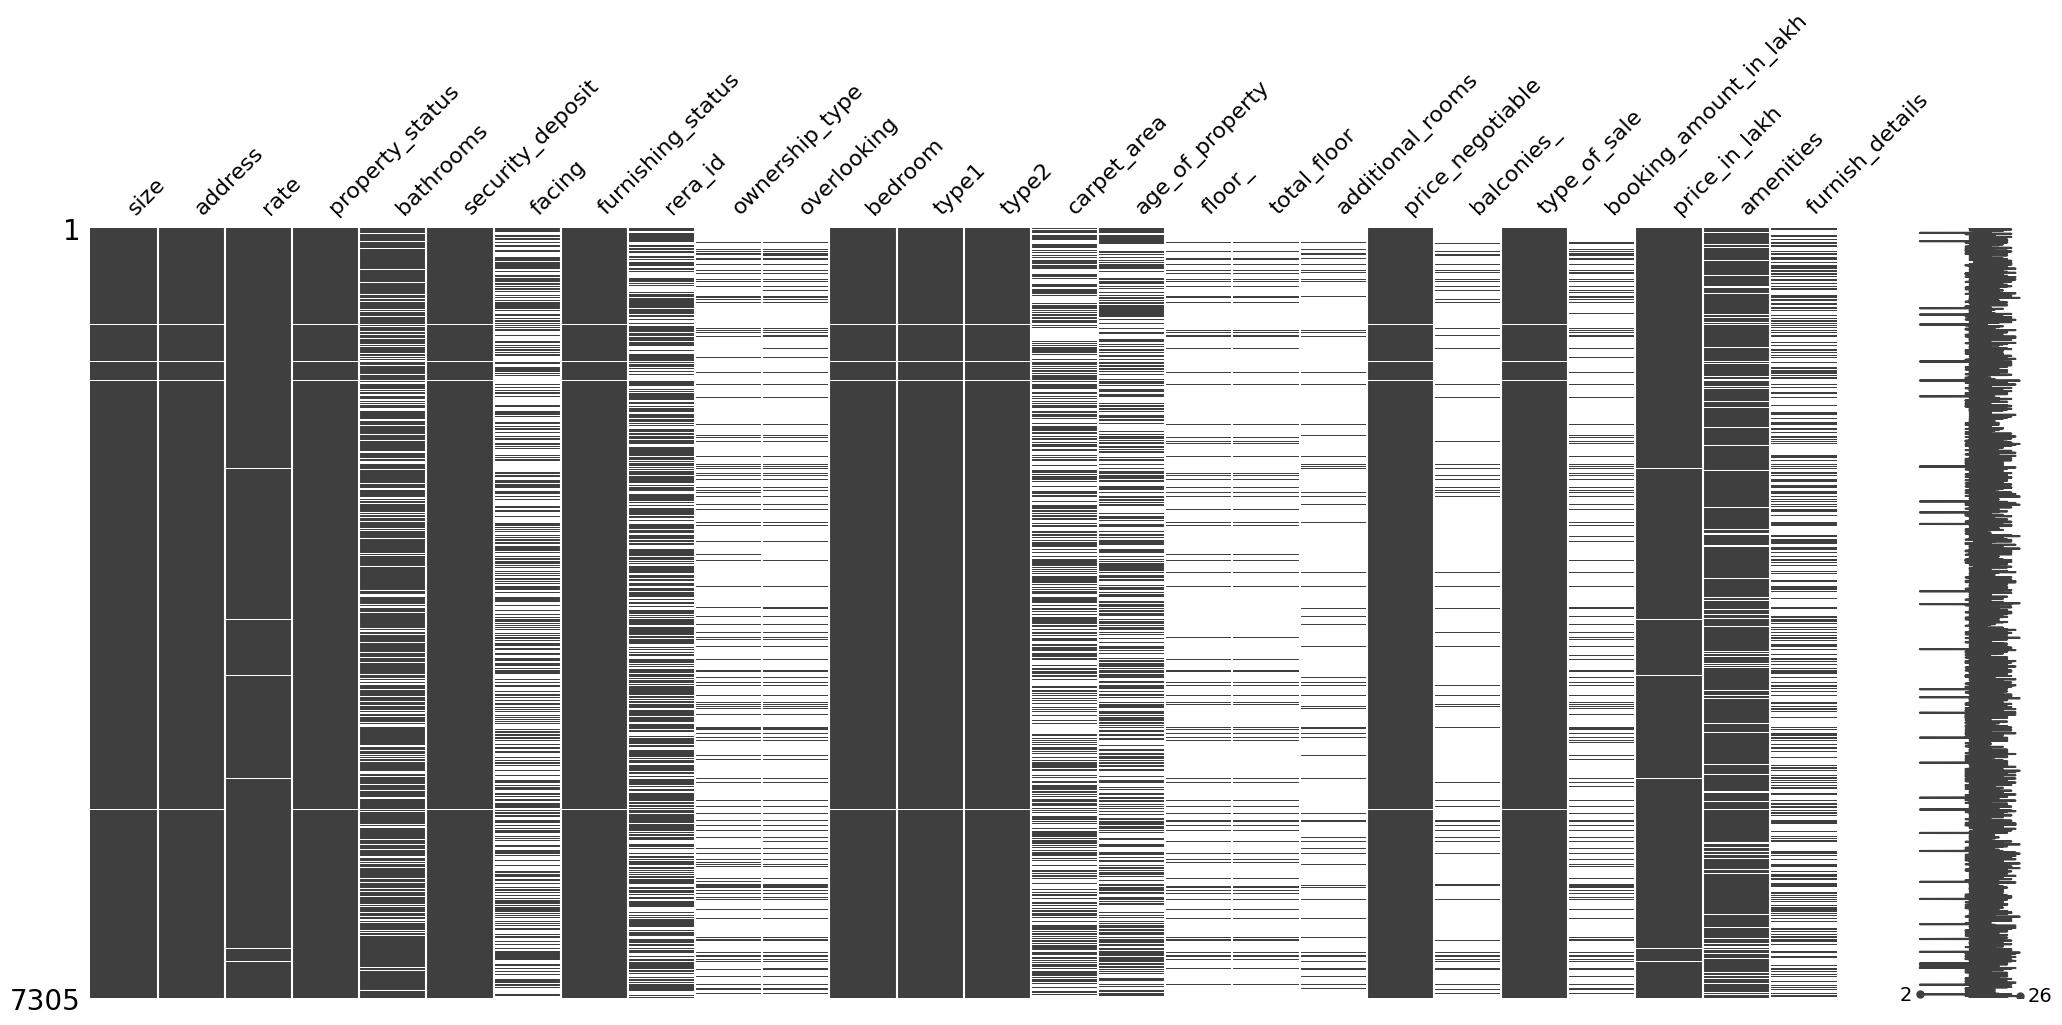

In [21]:
msno.matrix(df_)

<Axes: >

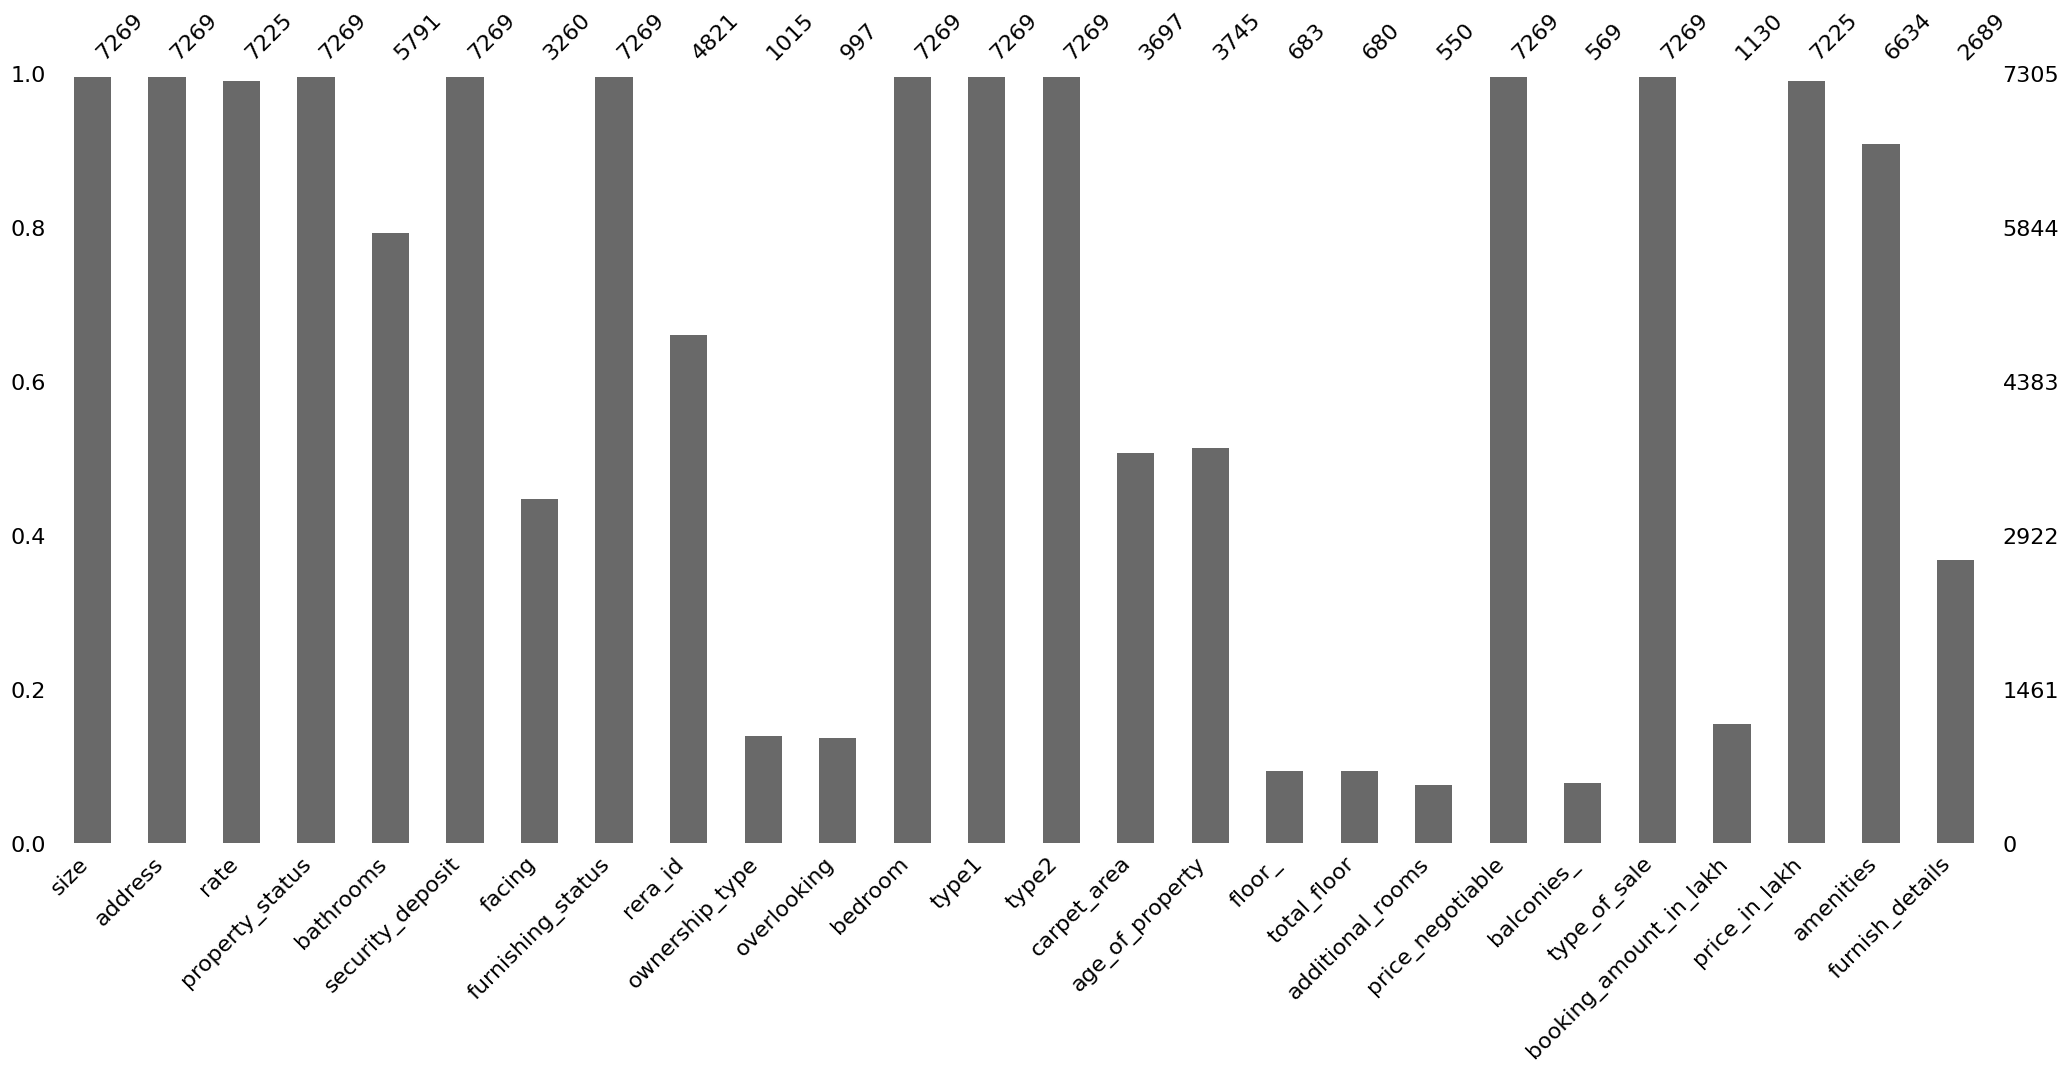

In [22]:
msno.bar(df_)

<Axes: >

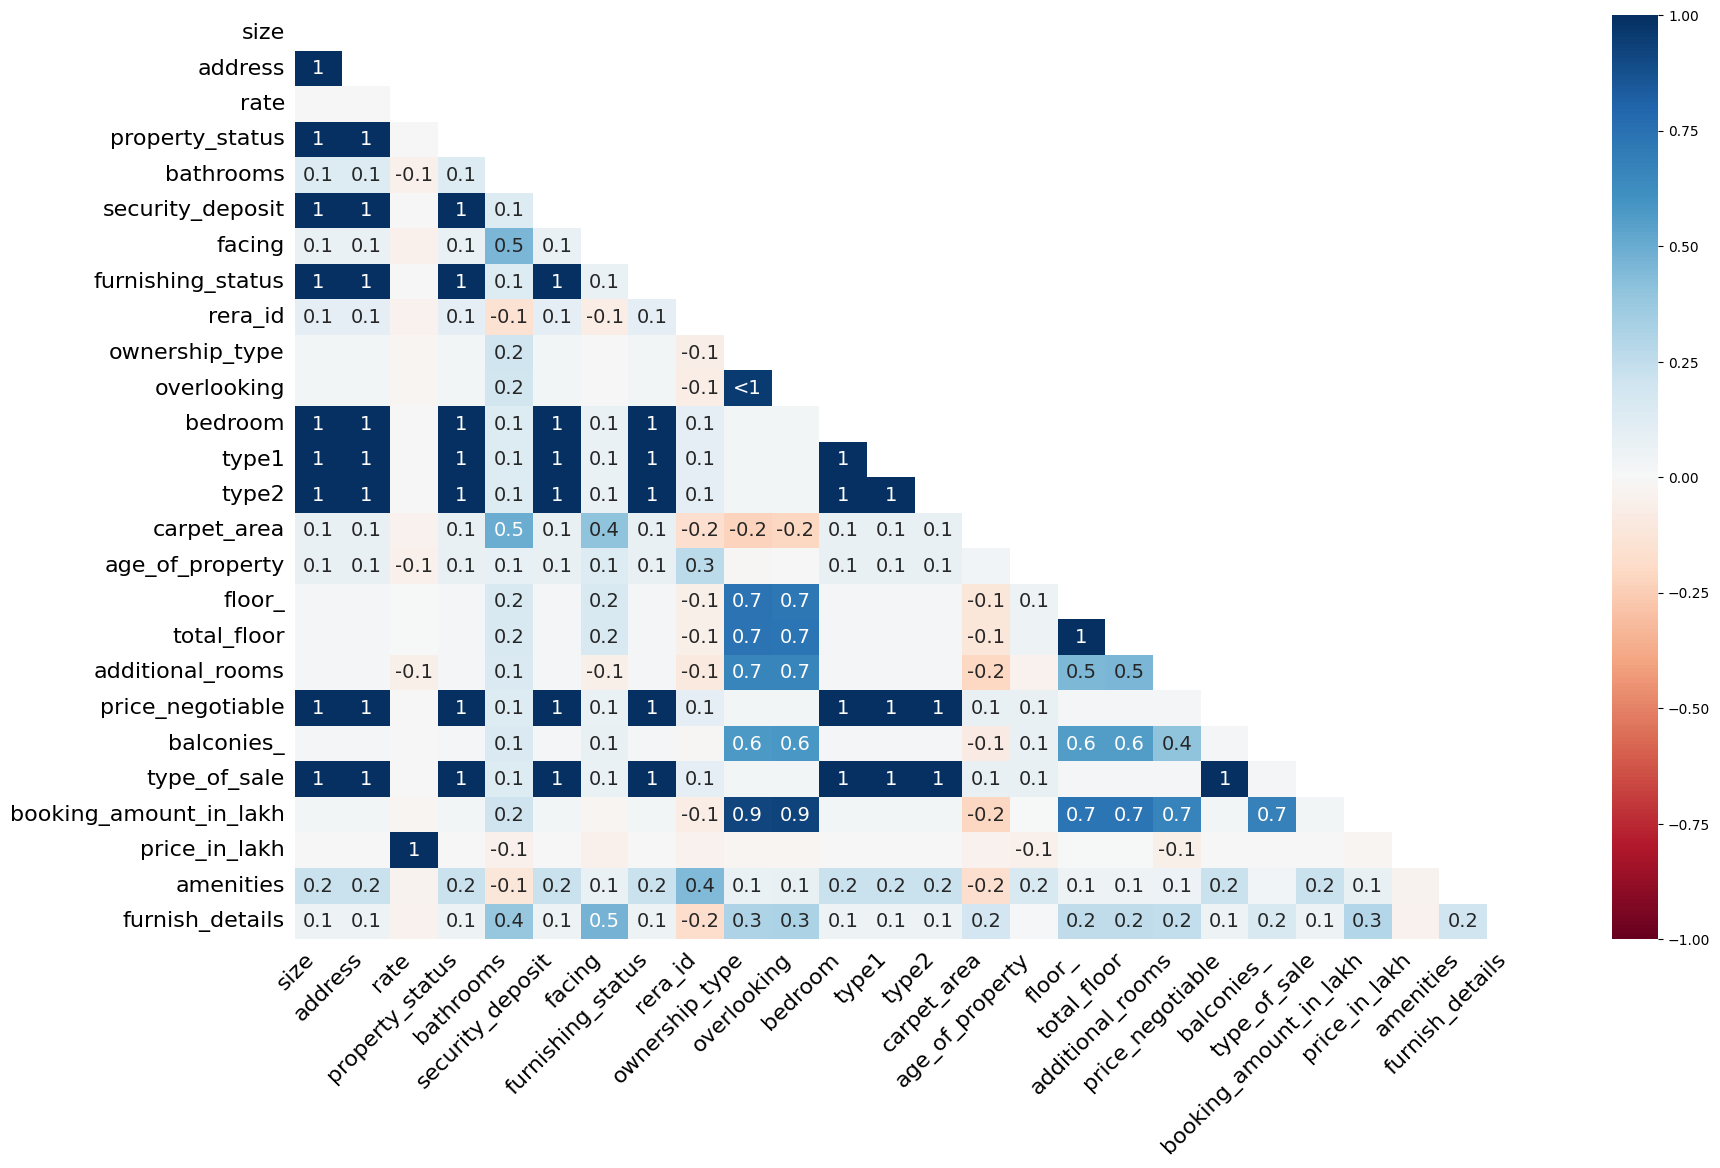

In [23]:
msno.heatmap(df_)

<Axes: >

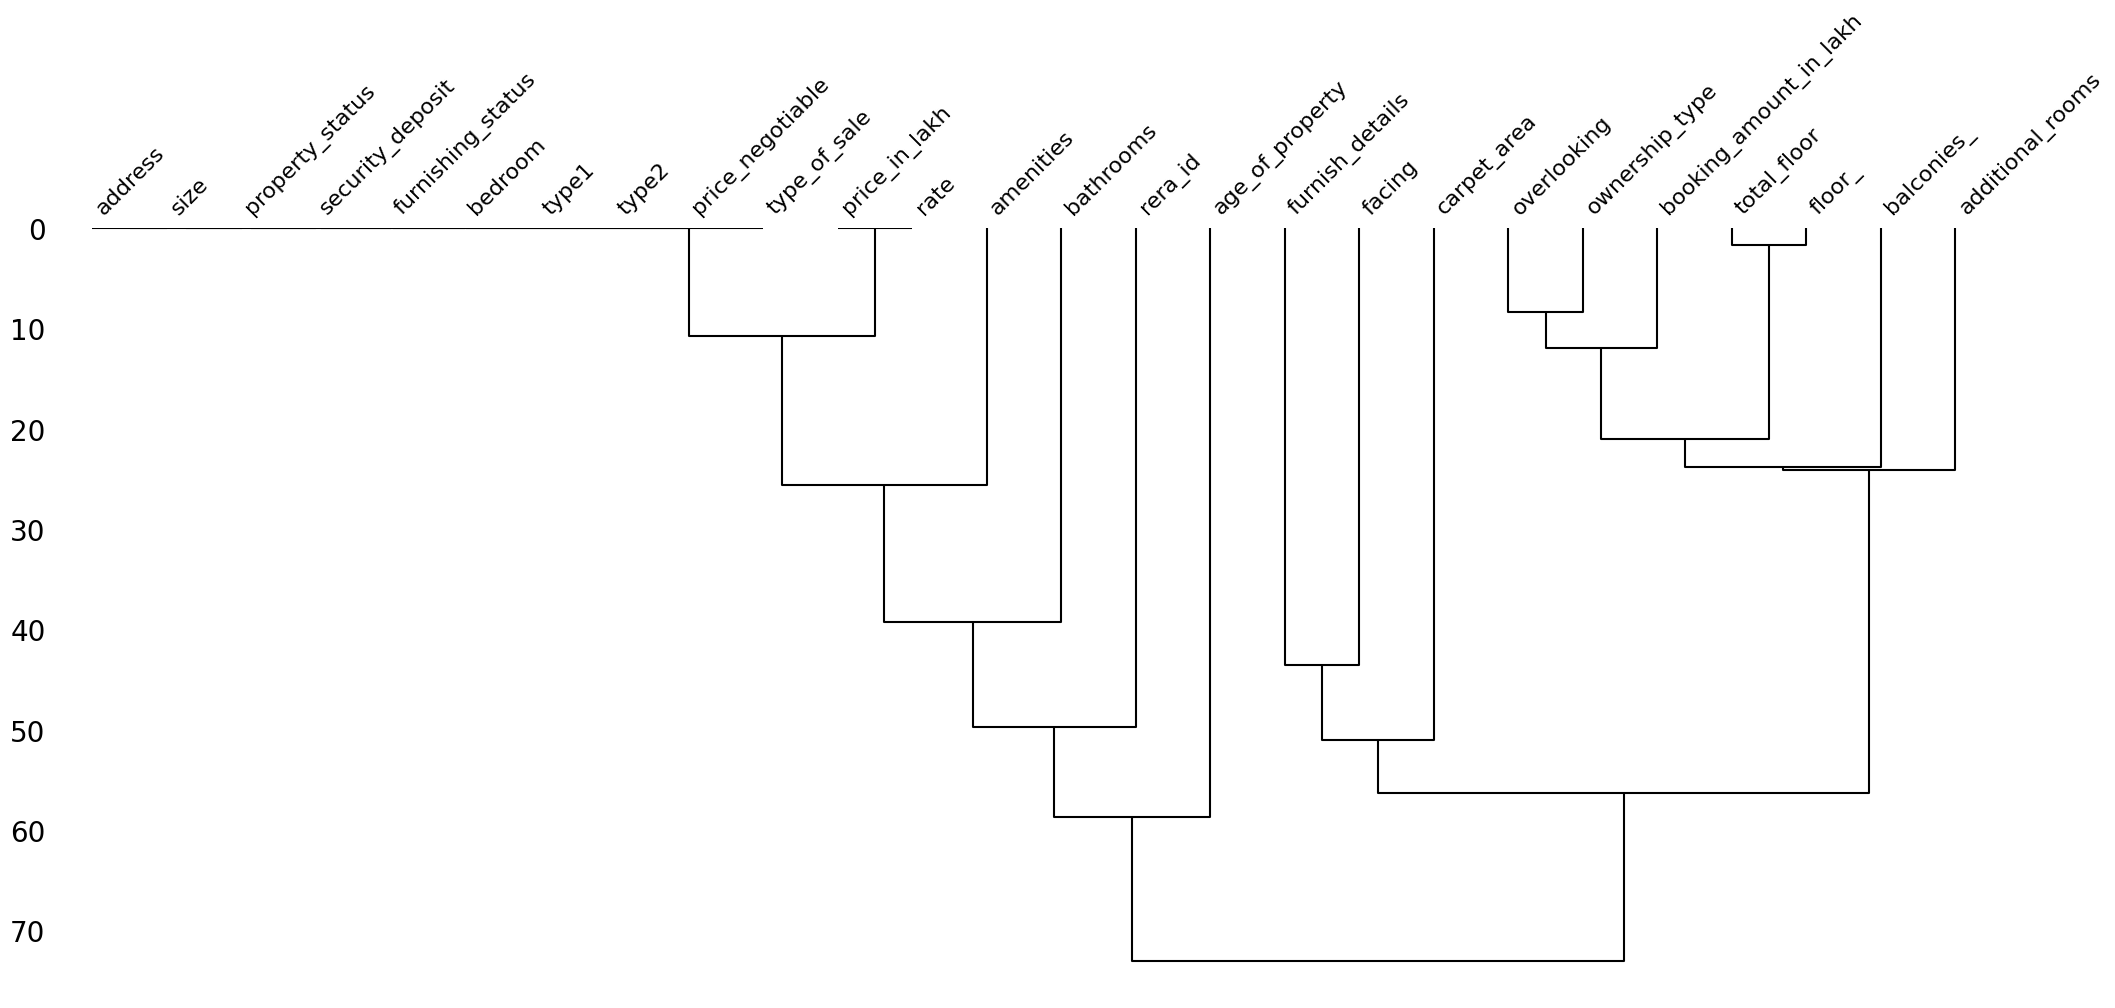

In [24]:
msno.dendrogram(df_)

In [25]:
df_.columns

Index(['size', 'address', 'rate', 'property_status', 'bathrooms',
       'security_deposit', 'facing', 'furnishing_status', 'rera_id',
       'ownership_type', 'overlooking', 'bedroom', 'type1', 'type2',
       'carpet_area', 'age_of_property', 'floor_', 'total_floor',
       'additional_rooms', 'price_negotiable', 'balconies_', 'type_of_sale',
       'booking_amount_in_lakh', 'price_in_lakh', 'amenities',
       'furnish_details'],
      dtype='object')

# Pair Plot

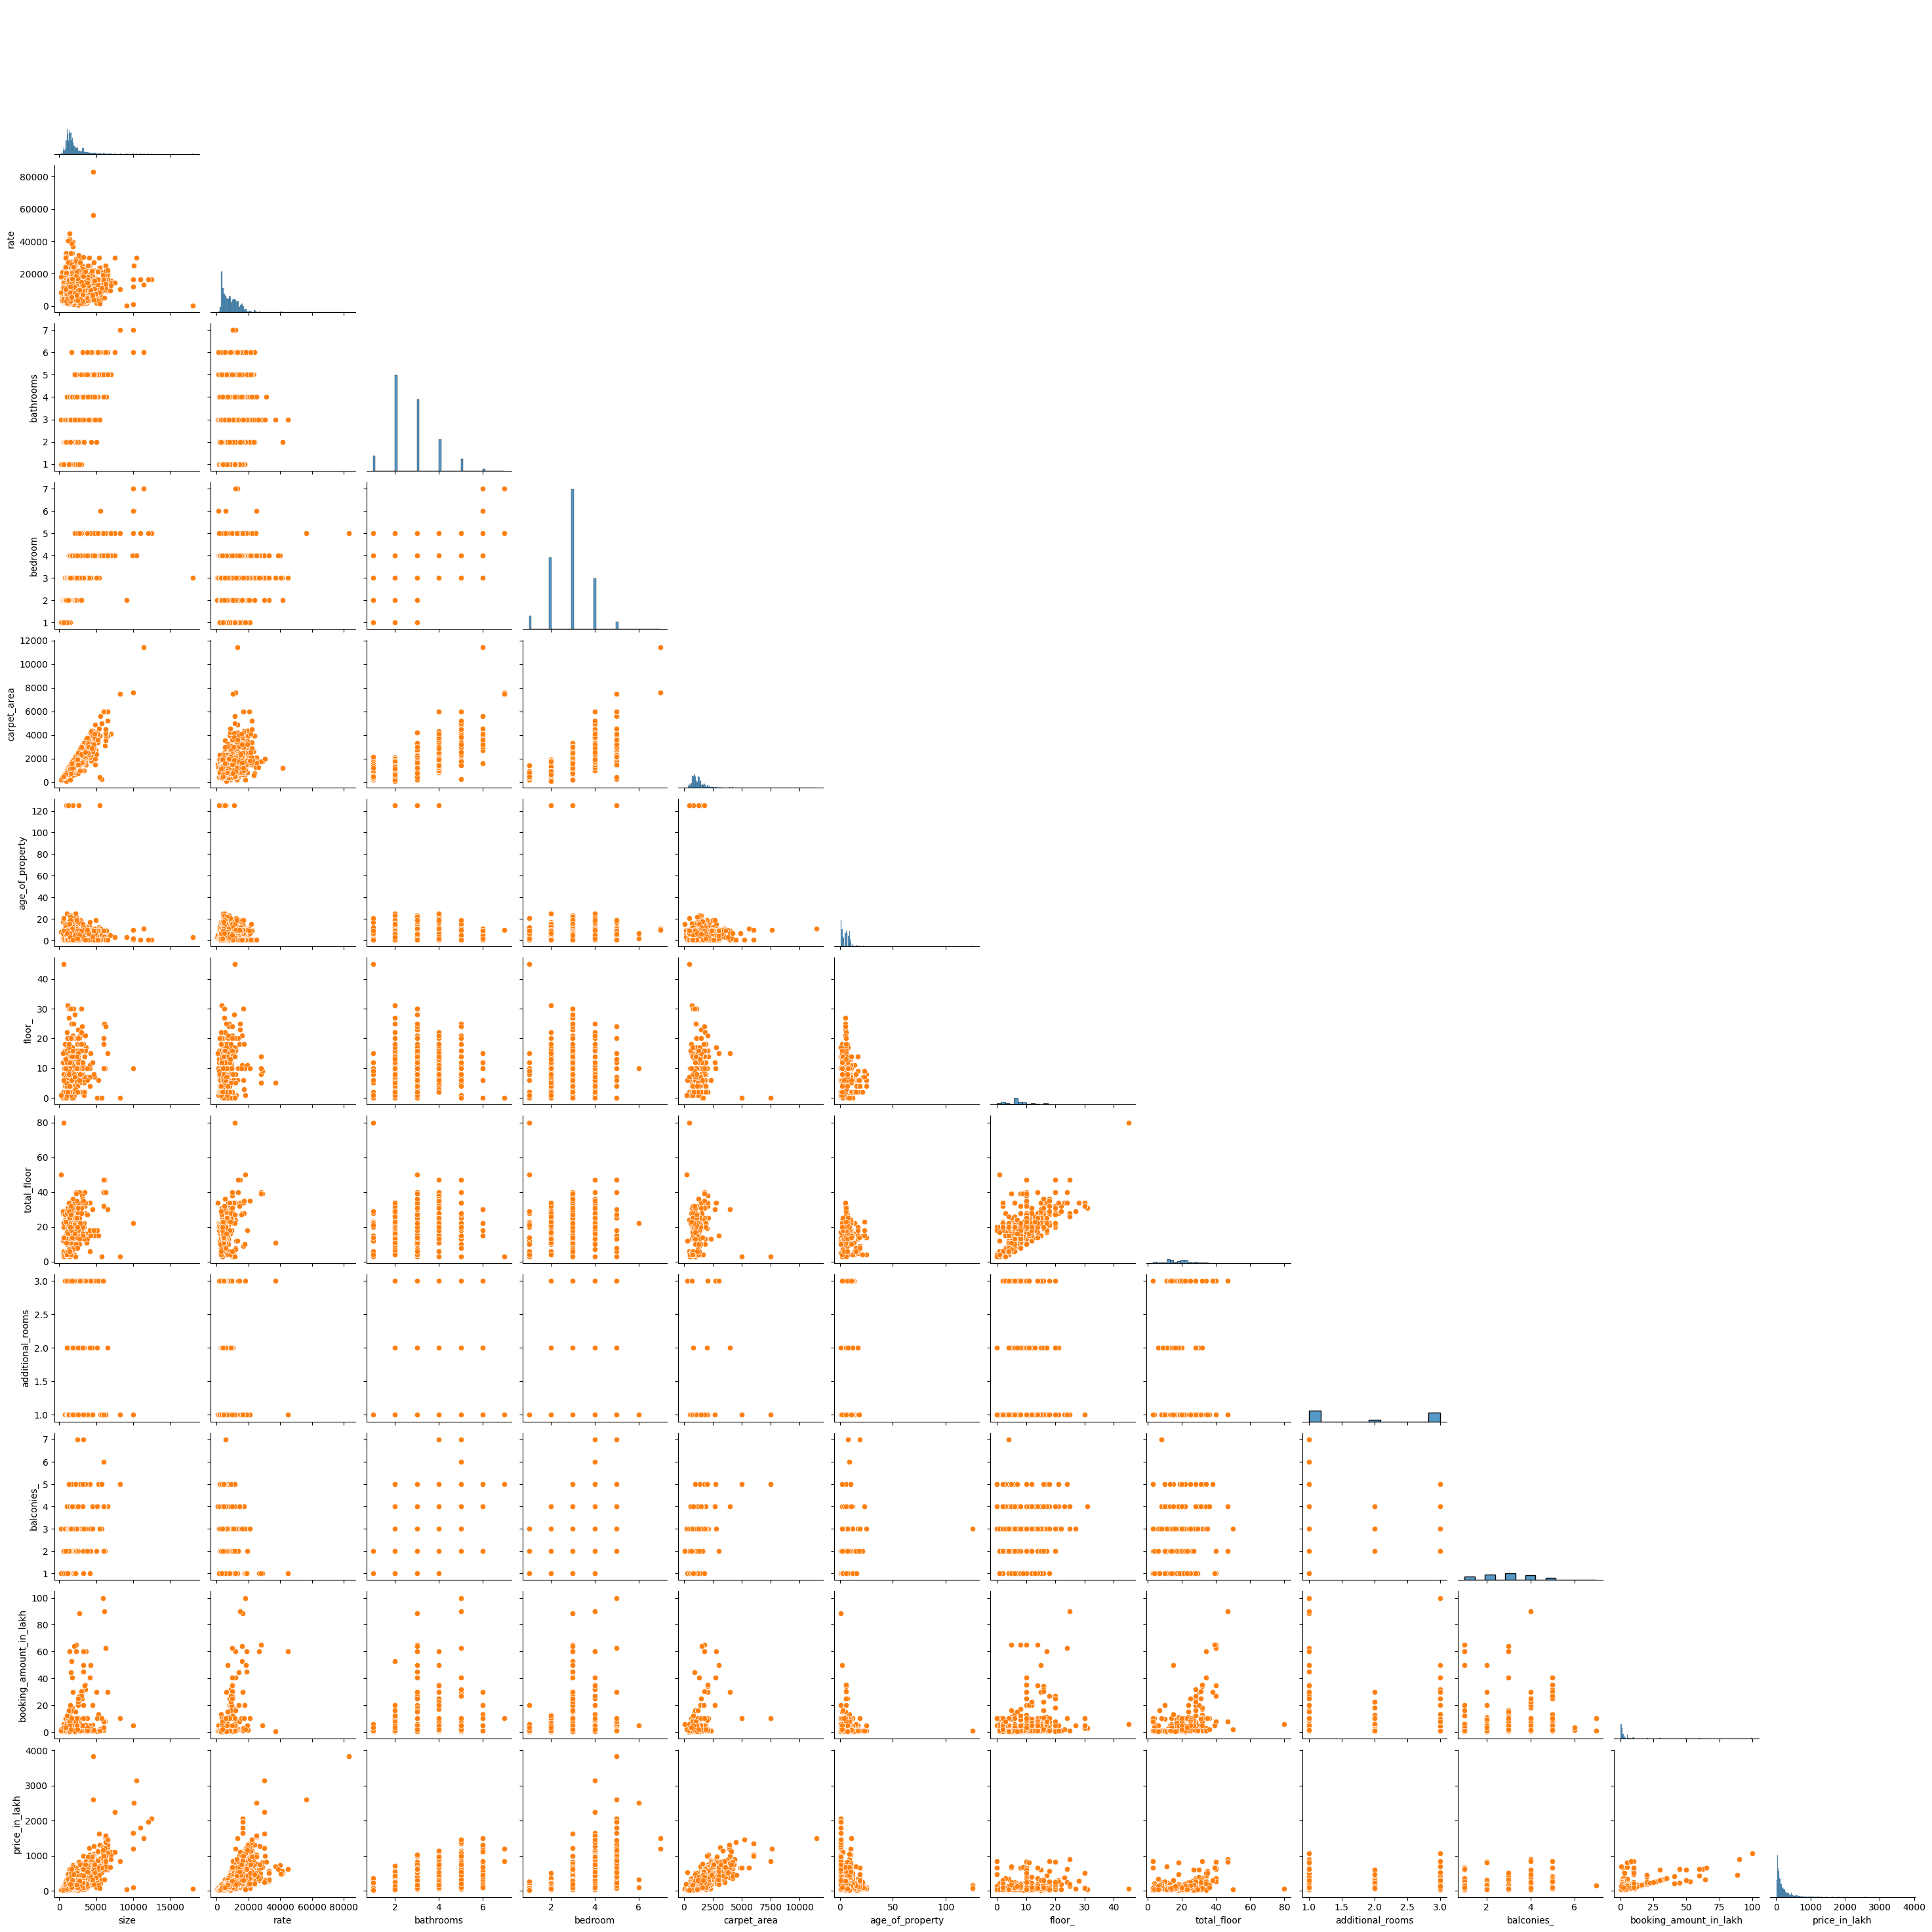

In [26]:
sns.pairplot(data=df_.select_dtypes(include="number"),corner=True).map_lower(sns.scatterplot)

# correlation analysis

<Axes: title={'center': 'Pearson Correlation Matrix Heatmap'}>

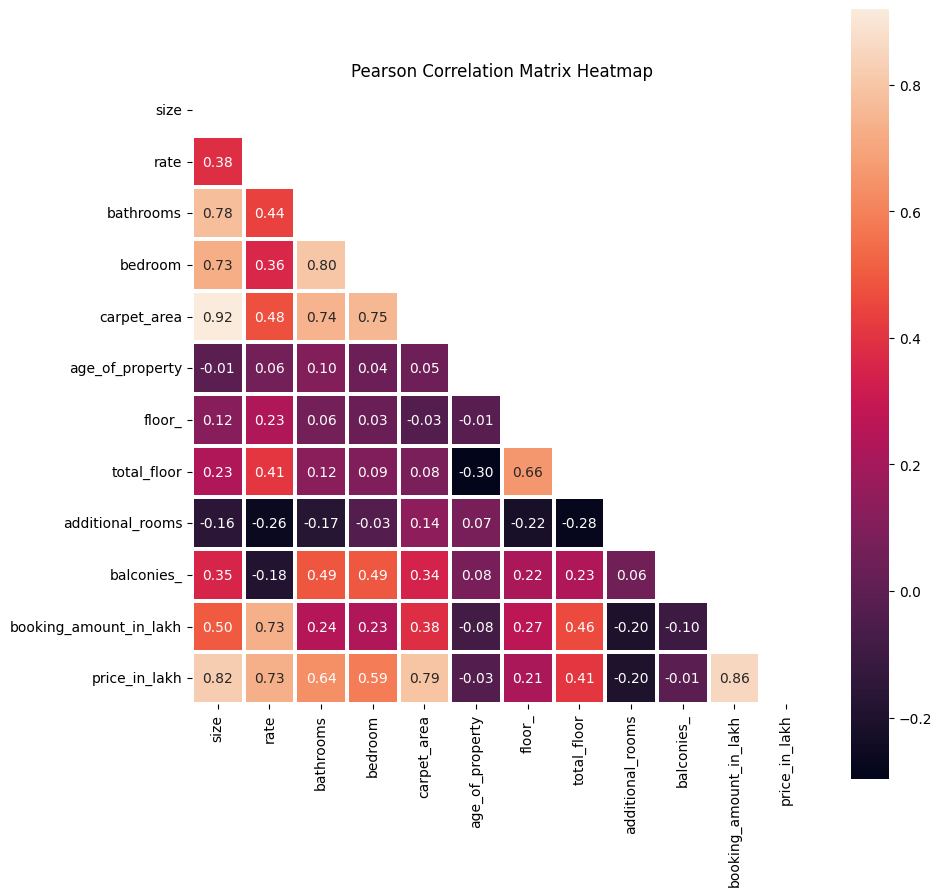

In [27]:
corr_=df_.select_dtypes(include="number").corr(method='pearson')
mask = np.zeros_like(corr_, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax.set(title="Pearson Correlation Matrix Heatmap")
sns.heatmap(corr_,
            annot=True,
            fmt=".2f",
            linewidths=1.5,
            square=True,
            ax=ax,
            mask=mask)


<Axes: title={'center': 'Pearson Correlation Matrix Heatmap'}>

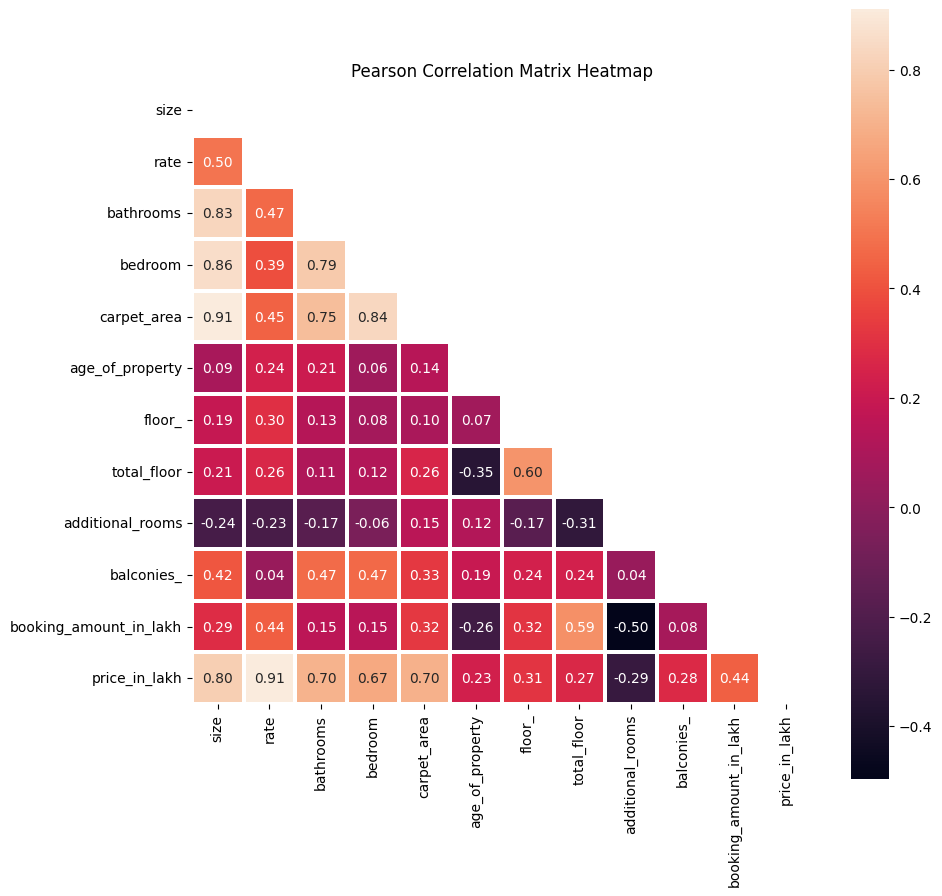

In [28]:
corr_=df_.select_dtypes(include="number").corr(method="spearman")
mask = np.zeros_like(corr_, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax.set(title="Pearson Correlation Matrix Heatmap")
sns.heatmap(corr_,
            annot=True,
            fmt=".2f",
            linewidths=1.5,
            square=True,
            ax=ax,
            mask=mask)

In [29]:
train.select_dtypes(include="object").columns

Index(['address', 'property_status', 'security_deposit', 'facing',
       'furnishing_status', 'rera_id', 'ownership_type', 'overlooking',
       'type1', 'type2', 'price_negotiable', 'type_of_sale',
       'amenities_sports_facility', 'amenities_shopping_mall',
       'amenities_maintenance_staff', 'amenities_jogging_track',
       'amenities_atm', 'amenities_gymnasium', 'amenities_indoor_games',
       'amenities_rain_water_harvesting', 'amenities_swimming_pool',
       'amenities_intercom', 'amenities_cafeteria',
       'amenities_full_power_backup', 'amenities_lift',
       'amenities_childrens_play_area', 'amenities_car_parking',
       'amenities_landscaped_gardens', 'amenities_24_x_7_security',
       'amenities_club_house', 'amenities_staff_quarter', 'amenities_hospital',
       'amenities_multipurpose_room', 'amenities_vaastu_compliant',
       'amenities_golf_course', 'amenities_school',
       'furnish_detail_gas_connection', 'furnish_detail_ac',
       'furnish_detail_bed',

In [30]:
train.assign(
    amenities=train.loc[:,[col for col in train.columns if "amenities" in col]].any(axis=1),
    furnish_detail=train.loc[:,[col for col in train.columns if "furnish" in col]].any(axis=1)).drop(columns=[col for col in train.columns if "amenities" in col or "furnish" in col])

,size,address,rate,property_status,bathrooms,security_deposit,facing,rera_id,ownership_type,overlooking,bedroom,type1,type2,carpet_area,age_of_property,floor_,total_floor,additional_rooms,price_negotiable,balconies_,type_of_sale,booking_amount_in_lakh,price_in_lakh,amenities,furnish_detail
0,3720.0,"sector 107, noida",14900.0,Under Construction,NaN,No Deposit,NaN,UPRERAPRJ125561,NaN,NaN,4.0,BHK,Apartment,NaN,NaN,NaN,NaN,NaN,No,NaN,New,NaN,554.00,True,True
1,850.0,"sector 53, noida",6249.0,Ready to move,2.0,No Deposit,NaN,NaN,Freehold,"Corner, Garden View, Pool View, Road View",2.0,BHK,Apartment,NaN,9.0,5.0,11.0,NaN,Yes,NaN,Resale,0.68,53.12,True,True
2,1075.0,"sector 74, noida",9767.0,Ready to move,2.0,No Deposit,NaN,UPRERAPRJ5655,NaN,NaN,2.0,BHK,Apartment,NaN,4.0,NaN,NaN,NaN,No,NaN,Resale,NaN,105.00,True,True
3,1927.0,"sector 150, noida",15938.0,Under Construction,NaN,No Deposit,NaN,"UPRERAPRJ13521, UPRERAPRJ14252",NaN,NaN,4.0,BHK,Apartment,NaN,NaN,NaN,NaN,NaN,No,NaN,New,NaN,307.00,True,True
4,1839.0,"sector 70, noida",8500.0,Ready to move,3.0,No Deposit,East,UPRERAPRJ5667,NaN,NaN,3.0,BHK,Apartment,1585.0,4.0,NaN,NaN,NaN,No,NaN,Resale,NaN,156.00,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,2062.0,"sector 150, noida",7904.0,Under Construction,3.0,No Deposit,NaN,"UPRERAPRJ13521, UPRERAPRJ14252",NaN,NaN,3.0,BHK,Apartment,NaN,NaN,NaN,NaN,NaN,No,NaN,New,NaN,163.00,True,True
7301,2473.0,"sector 150, noida",3639.0,Ready to move,4.0,No Deposit,NorthEast,UPRERAPRJ745601,Leasehol,"Corner, Garden View, Pool View, Road View",4.0,BHK,Apartment,1903.0,2.0,2.0,20.0,NaN,Yes,NaN,New,2.00,90.00,True,True
7302,2400.0,"yamuna expressway, noida",6875.0,Under Construction,4.0,No Deposit,NorthEast,"UPRERAPRJ6811, UPRERAPRJ6856, UPRERAPRJ6887, U...",NaN,NaN,3.0,BHK,Apartment,NaN,NaN,NaN,NaN,NaN,No,NaN,New,NaN,165.00,True,True
7303,1620.0,"sector 78, noida",5405.0,Under Construction,6.0,No Deposit,NaN,"UPRERAPRJ10343, UPRERAPRJ10944, UPRERAPRJ10857",NaN,NaN,3.0,BHK,Apartment,1620.0,NaN,NaN,NaN,NaN,No,NaN,New,NaN,87.56,True,True


In [31]:
from scipy import stats


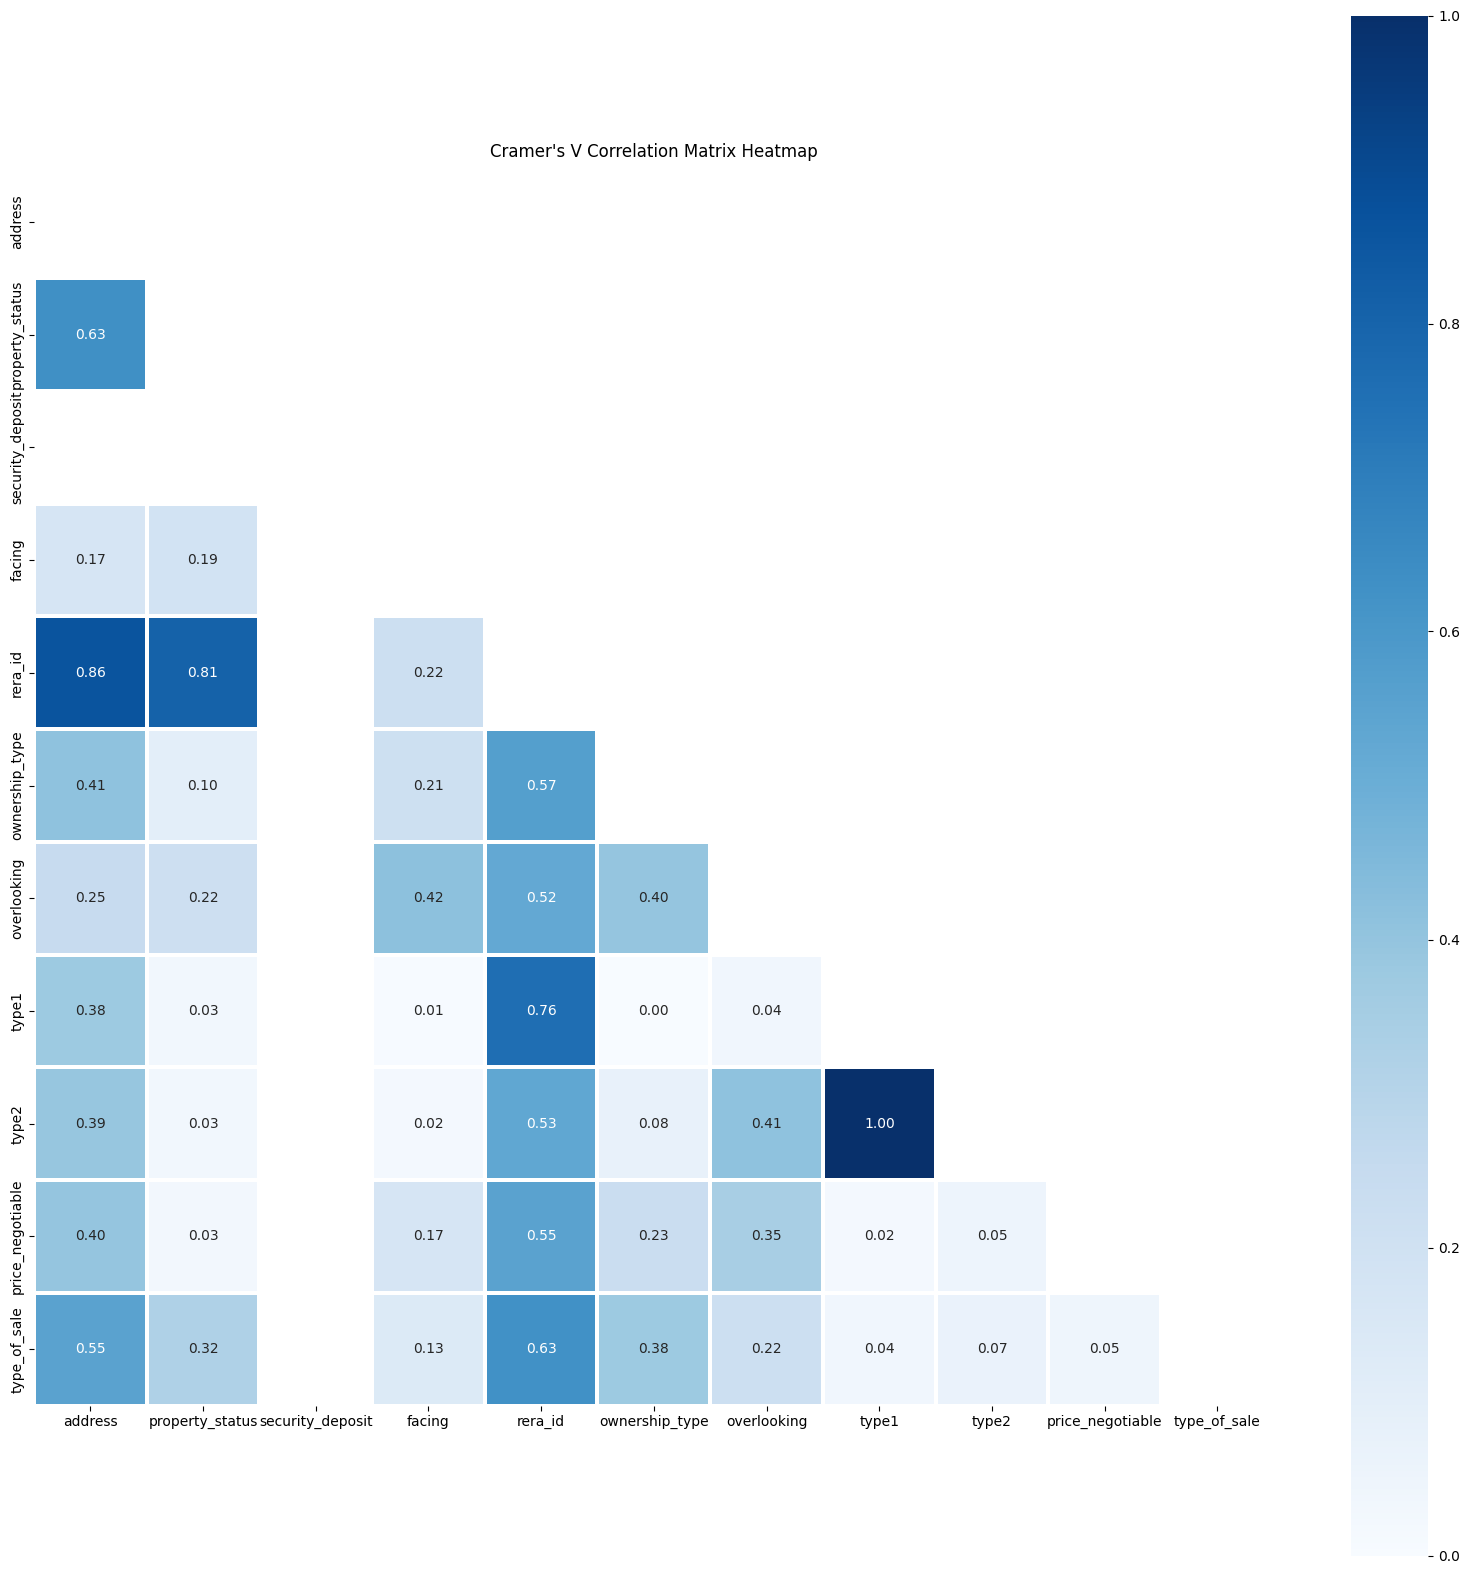

In [32]:
def cramers_v(data, var1, var2):
    cross_tab = pd.crosstab(data[var1], data[var2])
    r, c = cross_tab.shape
    n = cross_tab.sum().sum()
    
    # Extract chi-squared statistic
    chi2_stat = stats.chi2_contingency(cross_tab)[0]
    
    phi2 = chi2_stat / n
    
    # Bias correction
    phi2_ = max(0, phi2 - ((r - 1) * (c - 1) / (n - 1)))
    r_ = r - (((r - 1) ** 2) / (n - 1))
    c_ = c - (((c - 1) ** 2) / (n - 1))
    
    # Safeguard to avoid division by zero or negative values
    denominator = min(r_ - 1, c_ - 1)
    
    if denominator <= 0:
        return np.nan
    
    return np.sqrt(phi2_ / denominator)

def cramersV_heatmap(data, figsize=(12, 6), cmap="Blues"):
    cols = data.select_dtypes(include="O").columns.to_list()

    matrix = (
        pd.DataFrame(data=np.ones((len(cols), len(cols))))
        .set_axis(cols, axis=0)
        .set_axis(cols, axis=1)
    )

    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                matrix.loc[col1, col2] = cramers_v(data, col1, col2)

    mask = np.zeros_like(matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize=figsize)
    hm = sns.heatmap(
        matrix,
        vmin=0,
        vmax=1,
        cmap=cmap,
        annot=True,
        fmt=".2f",
        square=True,
        linewidths=1.5,
        mask=mask,
        ax=ax
    )
    ax.set(title="Cramer's V Correlation Matrix Heatmap")
    plt.show()
  
cramersV_heatmap(train.assign(
    amenities=train.loc[:,[col for col in train.columns if "amenities" in col]].any(axis=1),
    furnish_detail=train.loc[:,[col for col in train.columns if "furnish" in col]].any(axis=1)).drop(columns=[col for col in train.columns if "amenities" in col or "furnish" in col]),figsize=(20,20))
    
  
  
    

# Detail Analysis

In [33]:
train.columns

Index(['size', 'address', 'rate', 'property_status', 'bathrooms',
       'security_deposit', 'facing', 'furnishing_status', 'rera_id',
       'ownership_type', 'overlooking', 'bedroom', 'type1', 'type2',
       'carpet_area', 'age_of_property', 'floor_', 'total_floor',
       'additional_rooms', 'price_negotiable', 'balconies_', 'type_of_sale',
       'booking_amount_in_lakh', 'amenities_sports_facility',
       'amenities_shopping_mall', 'amenities_maintenance_staff',
       'amenities_jogging_track', 'amenities_atm', 'amenities_gymnasium',
       'amenities_indoor_games', 'amenities_rain_water_harvesting',
       'amenities_swimming_pool', 'amenities_intercom', 'amenities_cafeteria',
       'amenities_full_power_backup', 'amenities_lift',
       'amenities_childrens_play_area', 'amenities_car_parking',
       'amenities_landscaped_gardens', 'amenities_24_x_7_security',
       'amenities_club_house', 'amenities_staff_quarter', 'amenities_hospital',
       'amenities_multipurpose_room'

## 1. Size

0       3720.0
1        850.0
2       1075.0
3       1927.0
4       1839.0
         ...  
7300    2062.0
7301    2473.0
7302    2400.0
7303    1620.0
7304    1511.0
Name: size, Length: 7305, dtype: float64

Data Type      : float64
Missing Data   : 36 rows (0.49 %)
Available Data : 7,269 / 7,305 rows


,value
percentile,
0,250.0
5,800.0
10,953.0
25,1160.0
50,1565.0
75,2190.0
90,3270.0
95,3998.4
99,6100.0


,value
mean,1898.694731
trimmed mean (5%),1777.387681
trimmed mean (10%),1715.729512
median,1565.000000


,value
var,1.448537e+06
std,1.203552e+03
IQR,1.030000e+03
mad,4.650000e+02
coef_variance,6.338838e-01


,value
skewness,3.477312
kurtosis,23.438876


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.310578558988482e-75
Test Statistic       : 0.7346296012801954
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 414.0550957474052
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


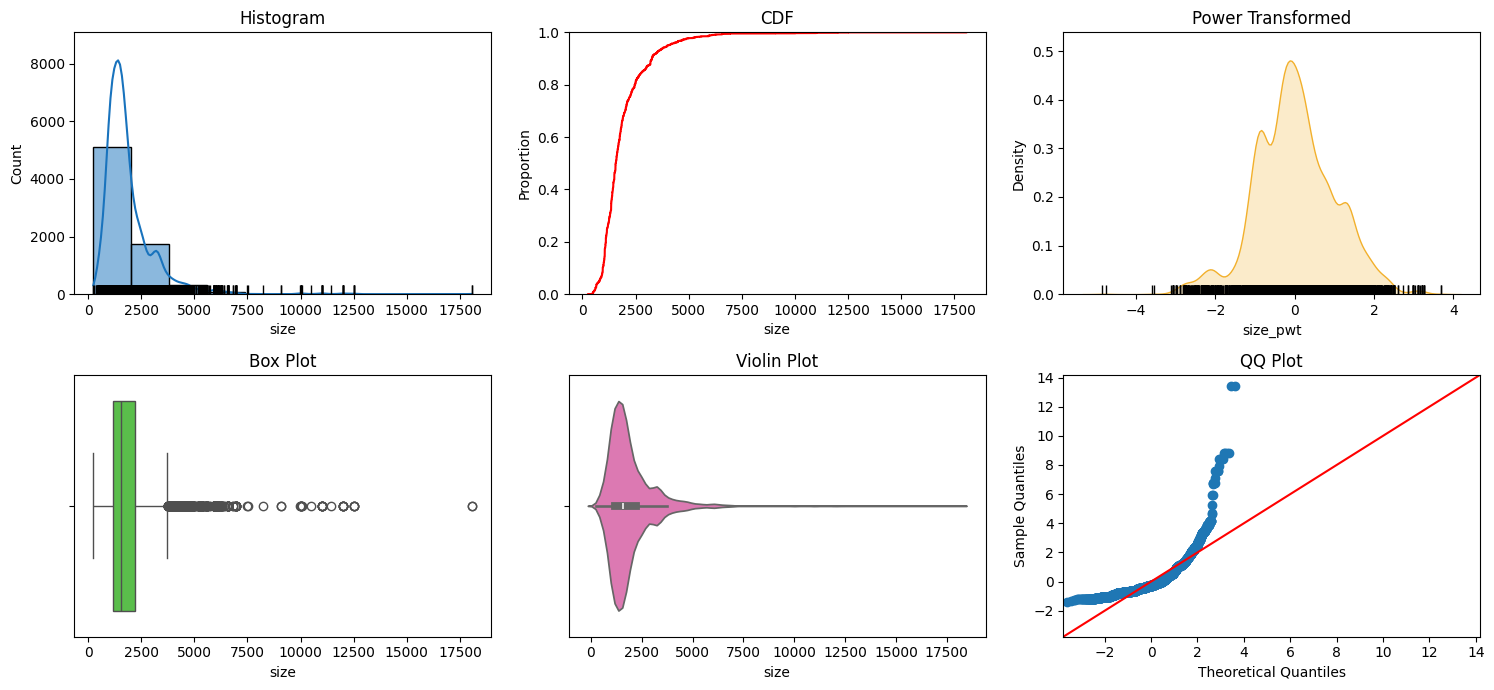

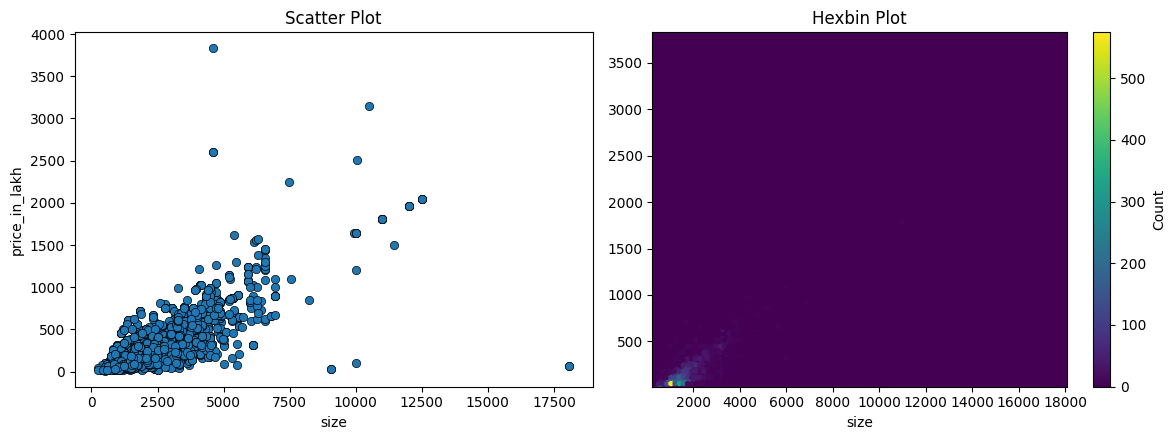

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.8201744738801364
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables size and price_in_lakh are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.8014358879739124
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables size and price_in_lakh are correlated


In [34]:
eda.num_summary(train,"size")
eda.num_univar_plots(train,"size")
eda.num_bivar_plots(train,"size","price_in_lakh")
eda.num_num_hyp_testing(train,"size","price_in_lakh")

## 2. address

0              sector 107, noida
1               sector 53, noida
2               sector 74, noida
3              sector 150, noida
4               sector 70, noida
                  ...           
7300           sector 150, noida
7301           sector 150, noida
7302    yamuna expressway, noida
7303            sector 78, noida
7304           sector 150, noida
Name: address, Length: 7305, dtype: object

Data Type      : object
Cardinality    : 102 categories
Missing Data   : 36 rows (0.49 %)
Available Data : 7,269 / 7,305 rows


,
count,7269
unique,102
top,"sector 150, noida"
freq,1079


,count,percentage
category,,
"sector 150, noida",1079,0.148439
"sector 73, noida",672,0.092447
"extension, noida",659,0.090659
"sector 137, noida",393,0.054065
"sector 128, noida",334,0.045949
"yamuna expressway, noida",286,0.039345
"sector 78, noida",231,0.031779
"sector 107, noida",224,0.030816
"sector 75, noida",214,0.029440


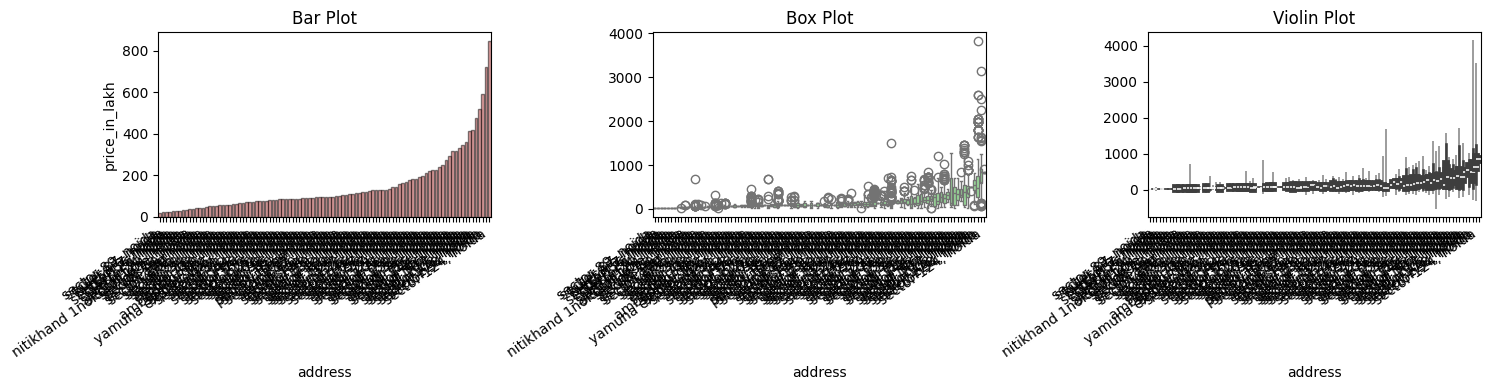

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 58.61640748286157
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and address are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 4131.291913092133
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and address are associated to each other


In [35]:
eda.cat_summary(train,"address")
eda.num_cat_bivar_plots(train,"price_in_lakh","address")
eda.num_cat_hyp_testing(train,"price_in_lakh","address")

# 3.property_status

0       Under Construction
1            Ready to move
2            Ready to move
3       Under Construction
4            Ready to move
               ...        
7300    Under Construction
7301         Ready to move
7302    Under Construction
7303    Under Construction
7304    Under Construction
Name: property_status, Length: 7305, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 36 rows (0.49 %)
Available Data : 7,269 / 7,305 rows


,
count,7269
unique,2
top,Ready to move
freq,5052


,count,percentage
category,,
Ready to move,5052,0.695006
Under Construction,2217,0.304994


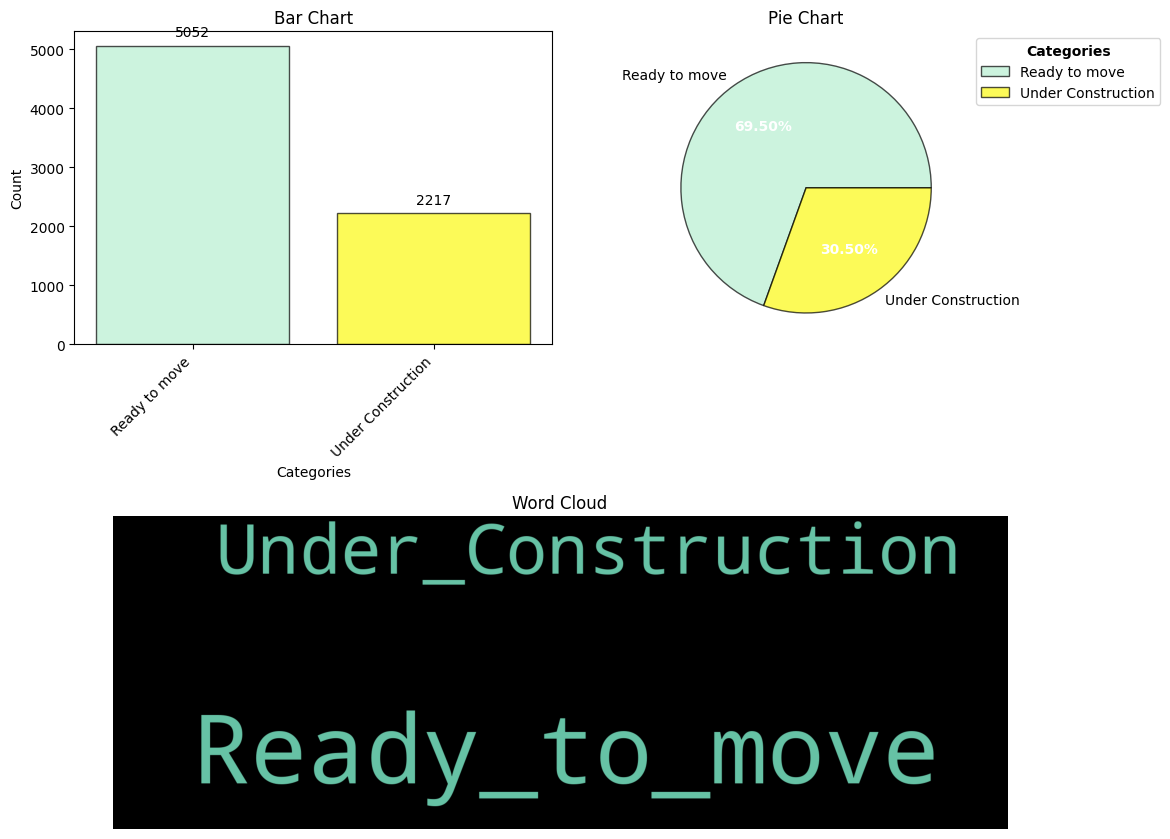

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 345.5302045893557
- p-value              : 2.2831474038979314e-75
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and property_status are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 699.5956844244305
- p-value              : 3.661215310045624e-154
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and property_status are associated to each other


In [36]:
eda.cat_summary(train,"property_status")
eda.cat_univar_plots(data=train,var="property_status")
eda.num_cat_hyp_testing(train,"price_in_lakh","property_status")

## 4. Bathrooms & Bedroom

In [37]:
eda.cat_summary(
    train.assign(
    bathrooms=train["bathrooms"].fillna(train["bedroom"]).astype(str)),"bathrooms")
eda.cat_summary(
    train.assign(
    bathrooms=train["bedroom"].astype(str)),"bedroom")

0       4.0
1       2.0
2       2.0
3       4.0
4       3.0
       ... 
7300    3.0
7301    4.0
7302    4.0
7303    6.0
7304    3.0
Name: bathrooms, Length: 7305, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 7,305 / 7,305 rows


,
count,7305
unique,8
top,2.0
freq,2691


,count,percentage
category,,
2.0,2691,0.368378
3.0,2543,0.348118
4.0,1173,0.160575
1.0,409,0.055989
5.0,400,0.054757
6.0,51,0.006982
nan,36,0.004928
7.0,2,0.000274


0       4.0
1       2.0
2       2.0
3       4.0
4       3.0
       ... 
7300    3.0
7301    4.0
7302    3.0
7303    3.0
7304    3.0
Name: bedroom, Length: 7305, dtype: float64

Data Type      : float64
Cardinality    : 7 categories
Missing Data   : 36 rows (0.49 %)
Available Data : 7,269 / 7,305 rows


,
count,7269.000000
mean,2.889668
std,0.851648
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,7.000000


,count,percentage
category,,
3.0,3586,0.493328
2.0,1837,0.252717
4.0,1300,0.178842
1.0,341,0.046912
5.0,200,0.027514
6.0,3,0.000413
7.0,2,0.000275


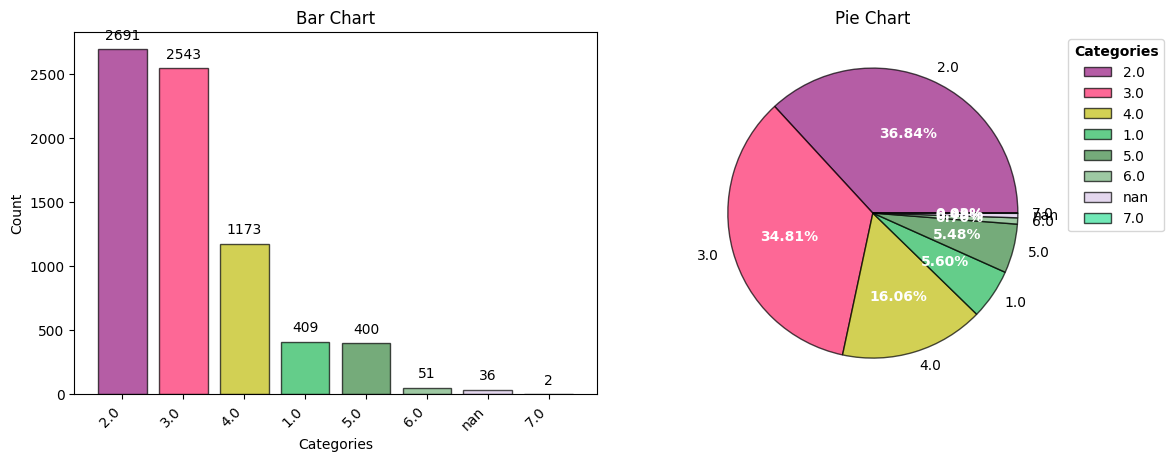

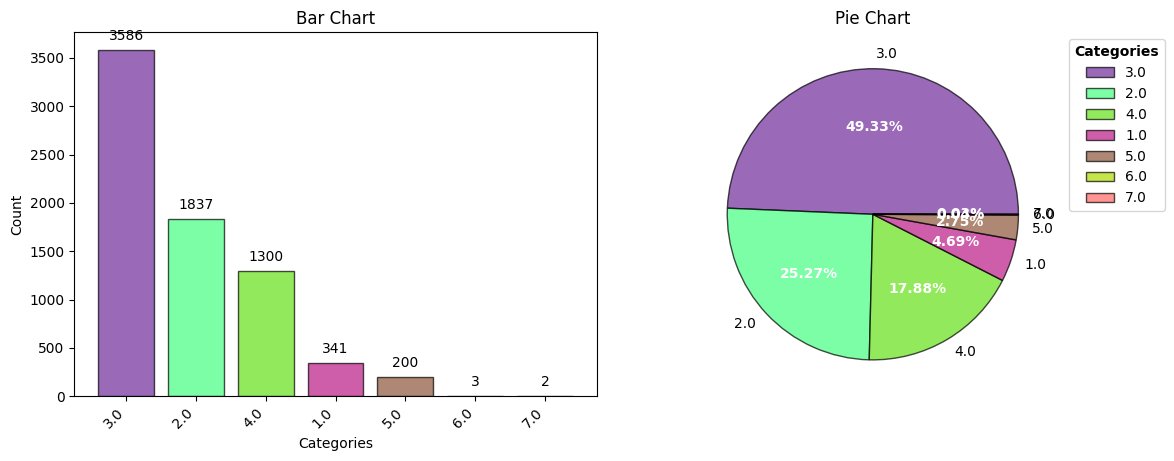

In [38]:
eda.cat_univar_plots(
    train.assign(
    bathrooms=train["bathrooms"].fillna(train["bedroom"]).astype(str)),"bathrooms",show_wordcloud=False)
eda.cat_univar_plots(
    train.assign(
    bathrooms=train["bedroom"].astype(str)),"bedroom",show_wordcloud=False)

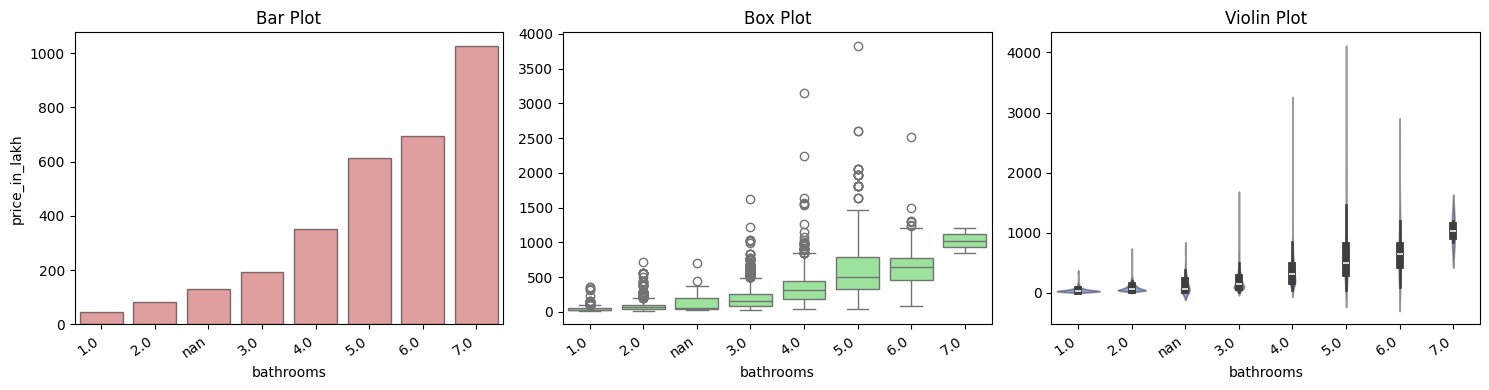

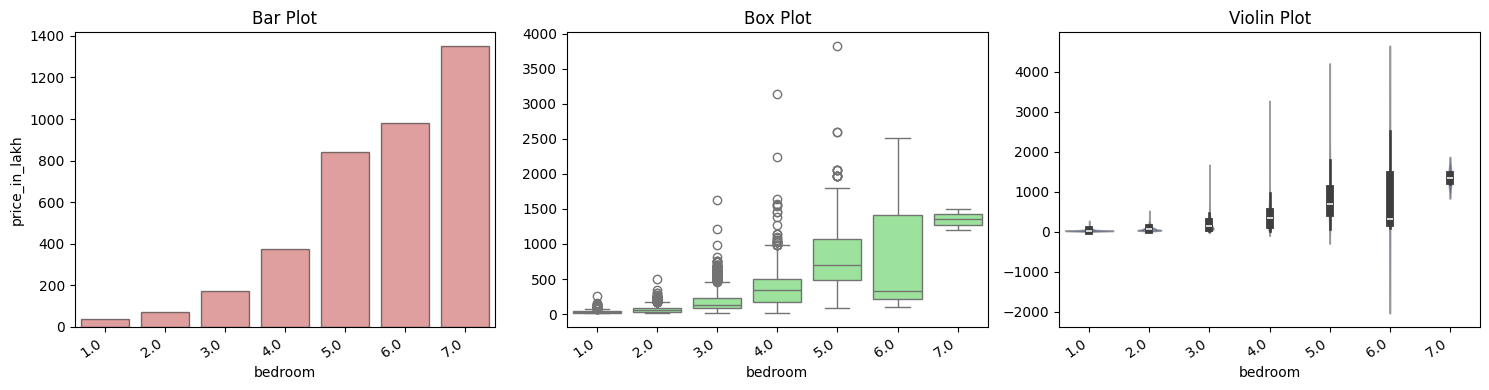

In [39]:
eda.num_cat_bivar_plots(
    train.assign(
        bathrooms=train["bathrooms"].fillna(train["bedroom"]).astype(str)),"price_in_lakh","bathrooms")
eda.num_cat_bivar_plots(
    train.assign(
    bathrooms=train["bedroom"].astype(str)),"price_in_lakh","bedroom")

In [40]:
eda.num_cat_hyp_testing(
    train.assign(
        bathrooms=train["bathrooms"].fillna(train["bedroom"]).astype(str)),"price_in_lakh","bathrooms"
)
eda.num_cat_hyp_testing(
    train.assign(
    bathrooms=train["bedroom"].astype(str)),"price_in_lakh","bedroom"
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 698.1286307652297
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and bathrooms are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3717.1897594379475
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and bathrooms are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 921.5303598077732
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and bedroom are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3292.274000552813
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and bedroom are associated to each other


In [41]:
eda.hyp_cat_cat(
    train.assign(
        bathrooms=train["bathrooms"].fillna(train["bedroom"]).astype(str),
        bedroom=train["bedroom"].astype(str)
    ),"bedroom","bathrooms"
)

- Cramers V            : 0.6923234394455019
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 24535.123288258128
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables bedroom and bathrooms are correlated


## 5. facing

In [42]:
eda.cat_summary(train,"facing")

0             NaN
1             NaN
2             NaN
3             NaN
4            East
          ...    
7300          NaN
7301    NorthEast
7302    NorthEast
7303          NaN
7304          NaN
Name: facing, Length: 7305, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 4,045 rows (55.37 %)
Available Data : 3,260 / 7,305 rows


,
count,3260
unique,8
top,NorthEast
freq,1455


,count,percentage
category,,
NorthEast,1455,0.446319
East,675,0.207055
North,379,0.116258
NorthWest,237,0.072699
West,149,0.045706
SouthEast,140,0.042945
South,131,0.040184
SouthWest,94,0.028834


# 6. furnishing status

In [43]:
eda.cat_summary(train,"furnishing_status")

0          Unfurnished
1          Unfurnished
2       Semi-Furnished
3          Unfurnished
4          Unfurnished
             ...      
7300       Unfurnished
7301       Unfurnished
7302    Semi-Furnished
7303       Unfurnished
7304       Unfurnished
Name: furnishing_status, Length: 7305, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 36 rows (0.49 %)
Available Data : 7,269 / 7,305 rows


,
count,7269
unique,3
top,Semi-Furnished
freq,3813


,count,percentage
category,,
Semi-Furnished,3813,0.524556
Unfurnished,3180,0.437474
Furnished,276,0.037969


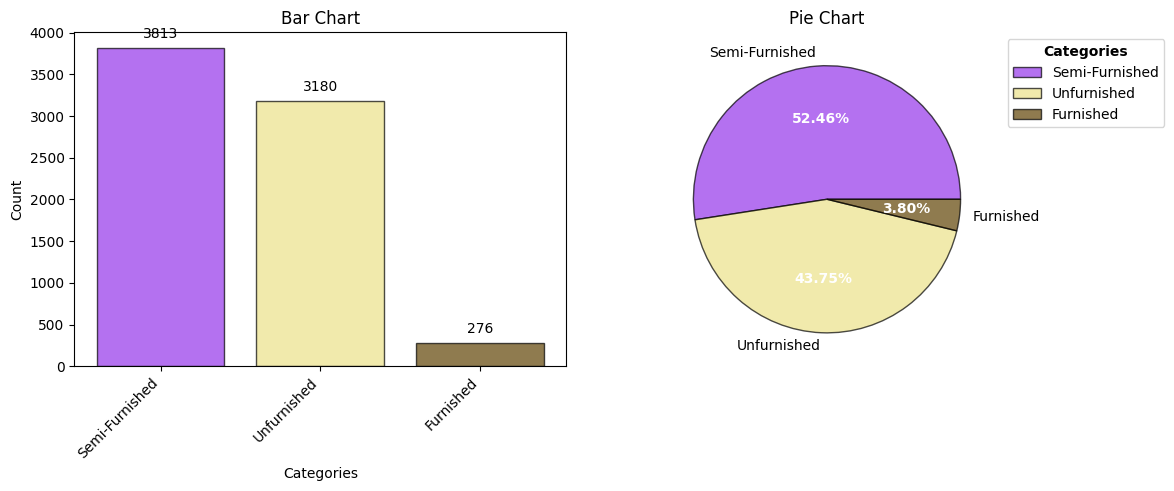

In [44]:
eda.cat_univar_plots(train,"furnishing_status",show_wordcloud=False)

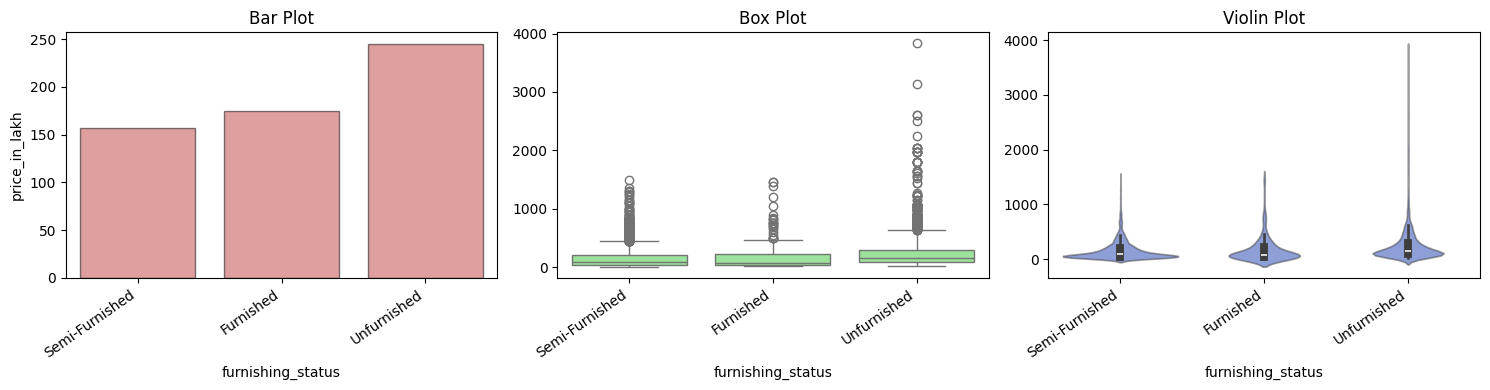

In [45]:
eda.num_cat_bivar_plots(train,"price_in_lakh","furnishing_status")

In [46]:
eda.num_cat_hyp_testing(train,"price_in_lakh","furnishing_status")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 129.787004354812
- p-value              : 4.249889612438445e-56
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and furnishing_status are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 483.37200585138675
- p-value              : 1.0891873183700353e-105
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and furnishing_status are associated to each other


# 7. carpet area

In [47]:
eda.num_num_hyp_testing(train,"carpet_area","size")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.9194377236813068
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables carpet_area and size are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.910647650743456
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables carpet_area and size are correlated


## 8. Age of property

In [48]:
eda.cat_summary(train,"age_of_property")

0       NaN
1       9.0
2       4.0
3       NaN
4       4.0
       ... 
7300    NaN
7301    2.0
7302    NaN
7303    NaN
7304    NaN
Name: age_of_property, Length: 7305, dtype: float64

Data Type      : float64
Cardinality    : 24 categories
Missing Data   : 3,560 rows (48.73 %)
Available Data : 3,745 / 7,305 rows


,
count,3745.000000
mean,5.712417
std,6.357185
min,1.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,125.000000


,count,percentage
category,,
1.0,667,0.178104
2.0,439,0.117223
6.0,403,0.107610
9.0,373,0.099599
7.0,353,0.094259
5.0,337,0.089987
8.0,263,0.070227
3.0,250,0.066756
4.0,208,0.055541


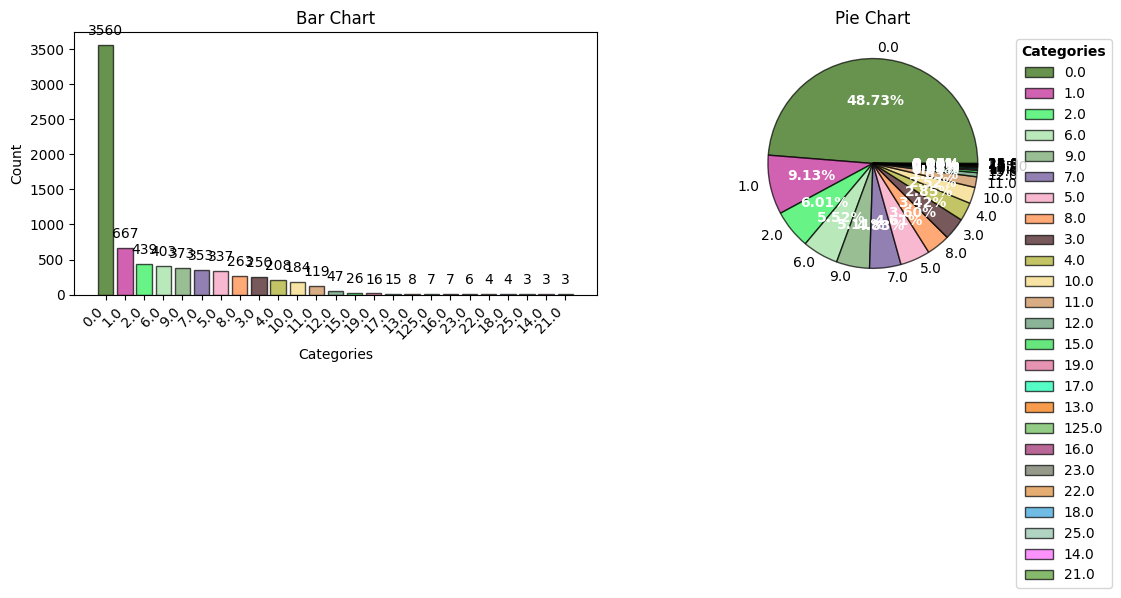

In [49]:
eda.cat_univar_plots(train.assign(age_of_property=train["age_of_property"].fillna(0).astype(str)),"age_of_property",show_wordcloud=False)

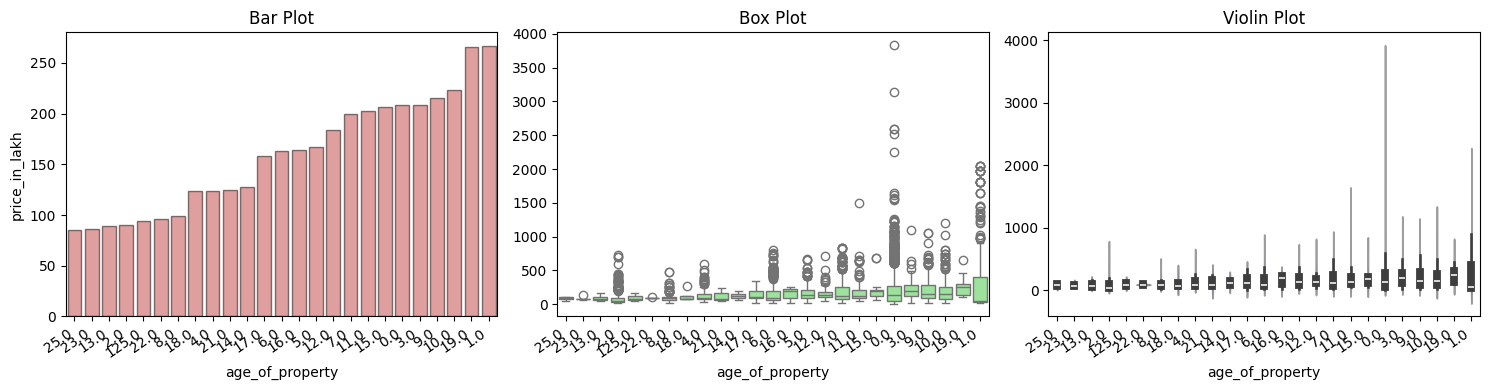

In [50]:
eda.num_cat_bivar_plots(train.assign(age_of_property=train["age_of_property"].fillna(0).astype(str)),"price_in_lakh","age_of_property")

In [51]:
eda.num_cat_hyp_testing(train.assign(age_of_property=train["age_of_property"].fillna(0).astype(str)),"price_in_lakh","age_of_property")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 10.805363704046298
- p-value              : 1.56617210527776e-40
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and age_of_property are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 492.2753861907395
- p-value              : 6.688550393305002e-89
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and age_of_property are associated to each other


In [52]:
train["ownership_type"].unique()

array([nan, 'Freehold', 'Leasehol', 'Co-Operative Society',
       'Power of Attorney'], dtype=object)

In [53]:
train["ownership_type"].fillna("missing_value").value_counts()

ownership_type
missing_value           6290
Freehold                 614
Leasehol                 392
Co-Operative Society       8
Power of Attorney          1
Name: count, dtype: int64

In [54]:
train["overlooking"].fillna("missing_value").value_counts()

overlooking
missing_value                                6308
Corner, Garden View, Pool View, Road View     652
Garden View, Pool View, Road View             190
Garden View                                    40
Road View                                      27
Road View, Pool View, Garden View              12
Road View, Garden View                         11
Pool View, Garden View                          9
Garden View, Pool View                          9
Road View, Corner                               8
Corner, Garden View, Pool View                  8
Corner, Road View                               7
Corner, Garden View, Road View                  6
Corner, Garden View                             6
Corner                                          6
Road View, Pool View                            4
Road View, Pool View, Corner                    1
Pool View, Corner, Garden View                  1
Name: count, dtype: int64

## 9. type1

In [55]:
eda.cat_summary(train,"type1")

0       BHK
1       BHK
2       BHK
3       BHK
4       BHK
       ... 
7300    BHK
7301    BHK
7302    BHK
7303    BHK
7304    BHK
Name: type1, Length: 7305, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 36 rows (0.49 %)
Available Data : 7,269 / 7,305 rows


,
count,7269
unique,2
top,BHK
freq,7211


,count,percentage
category,,
BHK,7211,0.992021
RK,58,0.007979


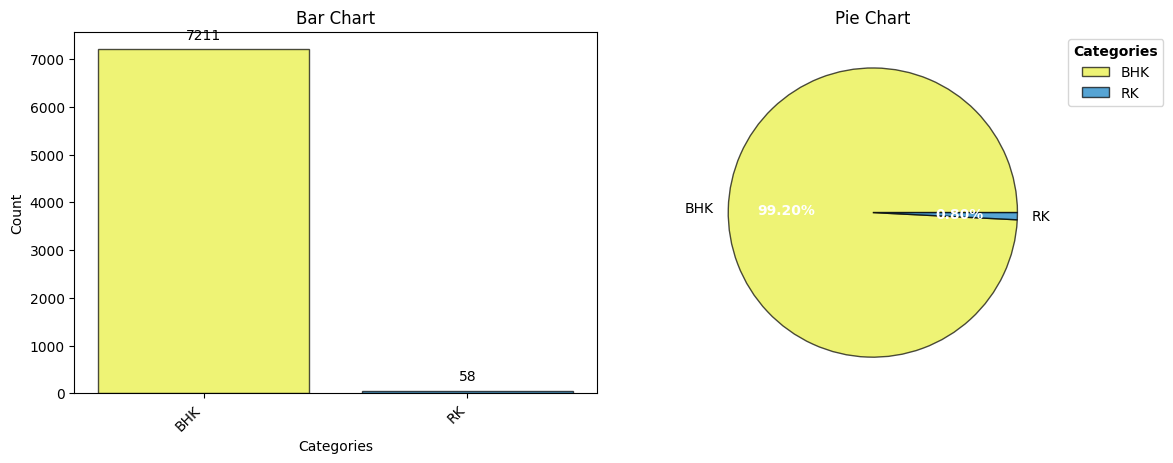

In [56]:
eda.cat_univar_plots(train,"type1",show_wordcloud=False)

# 10. type2

In [57]:
eda.cat_summary(train,"type2")

0       Apartment
1       Apartment
2       Apartment
3       Apartment
4       Apartment
          ...    
7300    Apartment
7301    Apartment
7302    Apartment
7303    Apartment
7304    Apartment
Name: type2, Length: 7305, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 36 rows (0.49 %)
Available Data : 7,269 / 7,305 rows


,
count,7269
unique,3
top,Apartment
freq,7054


,count,percentage
category,,
Apartment,7054,0.970422
Independent Floor,157,0.021599
Studio Apartment,58,0.007979


In [58]:
eda.num_cat_hyp_testing(train,"price_in_lakh","type2")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 44.68453633712101
- p-value              : 5.1693339805114975e-20
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and type2 are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 299.2054310905936
- p-value              : 1.067495765444617e-65
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and type2 are associated to each other


## 11. Additional rooms

In [59]:
train.additional_rooms.unique()

array([nan,  2.,  3.,  1.])

In [60]:
eda.cat_summary(train.assign(additional_rooms=train["additional_rooms"].fillna(0)),"additional_rooms")

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7300    0.0
7301    0.0
7302    0.0
7303    0.0
7304    0.0
Name: additional_rooms, Length: 7305, dtype: float64

Data Type      : float64
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 7,305 / 7,305 rows


,
count,7305.000000
mean,0.144695
std,0.570119
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


,count,percentage
category,,
0.0,6755,0.924709
1.0,271,0.037098
3.0,228,0.031211
2.0,51,0.006982


In [61]:
eda.num_cat_hyp_testing(train.assign(additional_rooms=train["additional_rooms"].fillna(0)),"price_in_lakh", "additional_rooms")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 7.0384076050052835
- p-value              : 0.00010104051688692234
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and additional_rooms are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 31.195278540557343
- p-value              : 7.732548322341173e-07
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and additional_rooms are associated to each other


## 12. price_negotiable

In [62]:
eda.cat_summary(train,"price_negotiable")

0        No
1       Yes
2        No
3        No
4        No
       ... 
7300     No
7301    Yes
7302     No
7303     No
7304     No
Name: price_negotiable, Length: 7305, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 36 rows (0.49 %)
Available Data : 7,269 / 7,305 rows


,
count,7269
unique,2
top,No
freq,6337


,count,percentage
category,,
No,6337,0.871784
Yes,932,0.128216


In [63]:
eda.num_cat_hyp_testing(train,"price_in_lakh","price_negotiable")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 37.595161961376455
- p-value              : 9.166801727825711e-10
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and price_negotiable are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 49.03445805542588
- p-value              : 2.5150516626435708e-12
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and price_negotiable are associated to each other


## 13. Balconies

In [64]:
eda.cat_summary(train.assign(
    **{"balconies":train["balconies_"].fillna(0)}
),"balconies")

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7300    0.0
7301    0.0
7302    0.0
7303    0.0
7304    0.0
Name: balconies, Length: 7305, dtype: float64

Data Type      : float64
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 7,305 / 7,305 rows


,
count,7305.000000
mean,0.224230
std,0.844795
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.000000


,count,percentage
category,,
0.0,6736,0.922108
3.0,170,0.023272
2.0,132,0.018070
4.0,122,0.016701
1.0,89,0.012183
5.0,51,0.006982
6.0,3,0.000411
7.0,2,0.000274


In [65]:
eda.num_cat_hyp_testing(train.assign(
    **{"balconies":train["balconies_"].fillna(0)}
),"price_in_lakh","balconies")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 9.91624611325643
- p-value              : 6.332137815897105e-11
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and balconies are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 102.83441106507112
- p-value              : 6.424911227711083e-20
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and balconies are associated to each other


## 14. type_of_sale

In [66]:
eda.cat_summary(train,"type_of_sale")

0          New
1       Resale
2       Resale
3          New
4       Resale
         ...  
7300       New
7301       New
7302       New
7303       New
7304       New
Name: type_of_sale, Length: 7305, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 36 rows (0.49 %)
Available Data : 7,269 / 7,305 rows


,
count,7269
unique,2
top,New
freq,4516


,count,percentage
category,,
New,4516,0.621268
Resale,2753,0.378732


In [67]:
pd.crosstab(train["age_of_property"],train["type_of_sale"])

type_of_sale,New,Resale
age_of_property,,
1.0,531,136
2.0,351,88
3.0,159,91
4.0,39,169
5.0,157,180
6.0,157,246
7.0,114,239
8.0,34,229
9.0,177,196


In [68]:
eda.num_cat_hyp_testing(train,"price_in_lakh","type_of_sale")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 1.1469720719526377
- p-value              : 0.28421986230114477
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and type_of_sale are not associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 96.89252189882262
- p-value              : 7.319460342245364e-23
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and type_of_sale are associated to each other


In [69]:
train.columns

Index(['size', 'address', 'rate', 'property_status', 'bathrooms',
       'security_deposit', 'facing', 'furnishing_status', 'rera_id',
       'ownership_type', 'overlooking', 'bedroom', 'type1', 'type2',
       'carpet_area', 'age_of_property', 'floor_', 'total_floor',
       'additional_rooms', 'price_negotiable', 'balconies_', 'type_of_sale',
       'booking_amount_in_lakh', 'amenities_sports_facility',
       'amenities_shopping_mall', 'amenities_maintenance_staff',
       'amenities_jogging_track', 'amenities_atm', 'amenities_gymnasium',
       'amenities_indoor_games', 'amenities_rain_water_harvesting',
       'amenities_swimming_pool', 'amenities_intercom', 'amenities_cafeteria',
       'amenities_full_power_backup', 'amenities_lift',
       'amenities_childrens_play_area', 'amenities_car_parking',
       'amenities_landscaped_gardens', 'amenities_24_x_7_security',
       'amenities_club_house', 'amenities_staff_quarter', 'amenities_hospital',
       'amenities_multipurpose_room'

## 15. Amenities

In [70]:
df_.amenities.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7300    False
7301    False
7302    False
7303    False
7304    False
Name: amenities, Length: 7305, dtype: bool

In [71]:
eda.cat_summary(df_.assign(amenities=df_["amenities"].isnull().astype(int)),"amenities")

0       0
1       0
2       0
3       0
4       0
       ..
7300    0
7301    0
7302    0
7303    0
7304    0
Name: amenities, Length: 7305, dtype: int64

Data Type      : int64
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 7,305 / 7,305 rows


,
count,7305.000000
mean,0.091855
std,0.288841
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,count,percentage
category,,
0,6634,0.908145
1,671,0.091855


In [72]:
eda.num_cat_hyp_testing(df_.assign(amenities=df_["amenities"].isnull().astype(int)),"price_in_lakh", "amenities")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 155.24598156502148
- p-value              : 2.845881002191656e-35
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and amenities are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 491.2414444138154
- p-value              : 7.650479316383277e-109
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_in_lakh and amenities are associated to each other
